# Labeled Faces in the Wild (LFW) experiment

In [128]:
import requests
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import tarfile
import os
import pandas as pd

# optionally download and unpack Labeled Faces in the Wild (170MB)
face_archive = 'lfw.tgz'
face_dir = 'lfw'
download_faces = False
unpack_faces = False

if download_faces:
    print ('Starting download ...')
    url = "http://vis-www.cs.umass.edu/lfw/" + face_archive
    response = requests.get(url)
    if response.status_code == 200:
        with open(face_archive, 'wb') as f:
            f.write(response.content)
            
    print ('Done.')
    
if unpack_faces:
    print ('Unpacking faces...')
    tf = tarfile.open(face_archive)
    tf.extractall()
    print ('Done.')

In [125]:
# normalize faces to this dimension
img_width = 120
img_height = 120

# Load the classifier
# Source: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def _extract_faces(img_path, scale_factor):
    # Read the input image
    img = cv2.imread(img_path)
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=scale_factor, minSize=(80, 80), minNeighbors=4)
            
    # Extract the first face
    extracted_faces = []

    n_faces = len(faces)
    if n_faces == 0 or n_faces > 1:
        #print ('Wrong number of faces detected:', n_faces, ', path:', img_path, ', scale:', scale_factor)
        pass
        
    for (x, y, w, h) in faces:
        # take the first only
        extracted_face = img[y:y+h, x:x+w]
        extracted_faces.append(extracted_face)
        #print ('w:', w, 'h:', h)
        
    return extracted_faces

def _resize_image(img):
    img = cv2.resize(img, (img_width, img_height), interpolation=cv2.INTER_CUBIC)
    return img

# adapt scale factor to extract exactly single face from the image
def extract_face(img_path):
    scale_factor = 1.05
    while scale_factor < 2.0:
        extracted_faces = _extract_faces(img_path, scale_factor)
        if (len(extracted_faces) == 1):
            print ('Image:', img_path, 'scale:', scale_factor);
            return _resize_image(extracted_faces[0])
        scale_factor += 0.05
        
    print ('Error, no face found:', img_path)
    return None

In [126]:
# Process data
person_list = os.listdir(path = face_dir)

all_person_extracted_faces = []
image_count = 0  

print ('Processing images...')

for person in person_list:
    person_extracted_faces = []
    all_person_extracted_faces.append({'name' : person, 'faces' : person_extracted_faces})
    person_imgs = os.listdir(path = os.path.join(face_dir, person))
    for person_img in person_imgs:
        img_full_path = os.path.join(face_dir, person, person_img)
        extracted_face = extract_face(img_full_path)
        if extracted_face is not None:
            person_extracted_faces.append(extracted_face)
            image_count += 1
        
print ('Person found: ', len(person_list), 'Images found:', image_count)

Processing images...
Image: lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg scale: 1.05
Image: lfw\Aaron_Guiel\Aaron_Guiel_0001.jpg scale: 1.05
Image: lfw\Aaron_Patterson\Aaron_Patterson_0001.jpg scale: 1.05
Image: lfw\Aaron_Peirsol\Aaron_Peirsol_0001.jpg scale: 1.05
Image: lfw\Aaron_Peirsol\Aaron_Peirsol_0002.jpg scale: 1.05
Image: lfw\Aaron_Peirsol\Aaron_Peirsol_0003.jpg scale: 1.05
Image: lfw\Aaron_Peirsol\Aaron_Peirsol_0004.jpg scale: 1.05
Image: lfw\Aaron_Pena\Aaron_Pena_0001.jpg scale: 1.05
Image: lfw\Aaron_Sorkin\Aaron_Sorkin_0001.jpg scale: 1.05
Image: lfw\Aaron_Sorkin\Aaron_Sorkin_0002.jpg scale: 1.05
Image: lfw\Aaron_Tippin\Aaron_Tippin_0001.jpg scale: 1.05
Image: lfw\Abbas_Kiarostami\Abbas_Kiarostami_0001.jpg scale: 1.05
Image: lfw\Abba_Eban\Abba_Eban_0001.jpg scale: 1.05
Image: lfw\Abdel_Aziz_Al-Hakim\Abdel_Aziz_Al-Hakim_0001.jpg scale: 1.05
Image: lfw\Abdel_Madi_Shabneh\Abdel_Madi_Shabneh_0001.jpg scale: 1.05
Image: lfw\Abdel_Nasser_Assidi\Abdel_Nasser_Assidi_0001.jpg scale: 1.05

Image: lfw\Aileen_Riggin_Soule\Aileen_Riggin_Soule_0001.jpg scale: 1.1
Image: lfw\Ainsworth_Dyer\Ainsworth_Dyer_0001.jpg scale: 1.05
Image: lfw\Ain_Seppik\Ain_Seppik_0001.jpg scale: 1.05
Image: lfw\Aishwarya_Rai\Aishwarya_Rai_0001.jpg scale: 1.05
Image: lfw\Aitor_Gonzalez\Aitor_Gonzalez_0001.jpg scale: 1.05
Image: lfw\Aitor_Gonzalez\Aitor_Gonzalez_0002.jpg scale: 1.05
Image: lfw\Aiysha_Smith\Aiysha_Smith_0001.jpg scale: 1.05
Image: lfw\Ai_Sugiyama\Ai_Sugiyama_0001.jpg scale: 1.05
Image: lfw\Ai_Sugiyama\Ai_Sugiyama_0002.jpg scale: 1.05
Image: lfw\Ai_Sugiyama\Ai_Sugiyama_0003.jpg scale: 1.05
Image: lfw\Ai_Sugiyama\Ai_Sugiyama_0004.jpg scale: 1.05
Image: lfw\Ai_Sugiyama\Ai_Sugiyama_0005.jpg scale: 1.05
Image: lfw\Ajit_Agarkar\Ajit_Agarkar_0001.jpg scale: 1.05
Image: lfw\AJ_Cook\AJ_Cook_0001.jpg scale: 1.05
Image: lfw\AJ_Lamas\AJ_Lamas_0001.jpg scale: 1.05
Image: lfw\Akbar_Al_Baker\Akbar_Al_Baker_0001.jpg scale: 1.05
Image: lfw\Akbar_Hashemi_Rafsanjani\Akbar_Hashemi_Rafsanjani_0001.jpg sca

Image: lfw\Alessandro_Nesta\Alessandro_Nesta_0001.jpg scale: 1.05
Image: lfw\Alexander_Downer\Alexander_Downer_0001.jpg scale: 1.05
Image: lfw\Alexander_Downer\Alexander_Downer_0002.jpg scale: 1.05
Image: lfw\Alexander_Downer\Alexander_Downer_0003.jpg scale: 1.05
Image: lfw\Alexander_Downer\Alexander_Downer_0004.jpg scale: 1.05
Image: lfw\Alexander_Losyukov\Alexander_Losyukov_0001.jpg scale: 1.05
Image: lfw\Alexander_Losyukov\Alexander_Losyukov_0002.jpg scale: 1.05
Image: lfw\Alexander_Losyukov\Alexander_Losyukov_0003.jpg scale: 1.05
Image: lfw\Alexander_Losyukov\Alexander_Losyukov_0004.jpg scale: 1.05
Image: lfw\Alexander_Lukashenko\Alexander_Lukashenko_0001.jpg scale: 1.05
Image: lfw\Alexander_Payne\Alexander_Payne_0001.jpg scale: 1.05
Image: lfw\Alexander_Rumyantsev\Alexander_Rumyantsev_0001.jpg scale: 1.05
Image: lfw\Alexander_Rumyantsev\Alexander_Rumyantsev_0002.jpg scale: 1.05
Image: lfw\Alexandra_Jackson\Alexandra_Jackson_0001.jpg scale: 1.05
Image: lfw\Alexandra_Pelosi\Alexandr

Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0023.jpg scale: 1.1500000000000001
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0024.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0025.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0026.jpg scale: 1.2500000000000002
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0027.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0028.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0029.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0030.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0031.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0032.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0033.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0034.jpg scale: 1.05
Image: lfw\Alvaro_Uribe\Alvaro_Uribe_0035.jpg scale: 1.05
Image: lfw\Alyse_Beaupre\Alyse_Beaupre_0001.jpg scale: 1.05
Image: lfw\Alyson_Hannigan\Alyson_Hannigan_0001.jpg scale: 1.05
Image: lfw\Aly_Wagner\Aly_Wagner_0001.jpg scale: 1.05
Image: lfw\Al_Cardenas\Al_Cardenas_0001.

Image: lfw\Andrew_Cuomo\Andrew_Cuomo_0001.jpg scale: 1.05
Image: lfw\Andrew_Cuomo\Andrew_Cuomo_0002.jpg scale: 1.05
Image: lfw\Andrew_Fastow\Andrew_Fastow_0001.jpg scale: 1.05
Image: lfw\Andrew_Firestone\Andrew_Firestone_0001.jpg scale: 1.05
Image: lfw\Andrew_Gilligan\Andrew_Gilligan_0001.jpg scale: 1.05
Image: lfw\Andrew_Jarecki\Andrew_Jarecki_0001.jpg scale: 1.05
Image: lfw\Andrew_Luster\Andrew_Luster_0001.jpg scale: 1.05
Image: lfw\Andrew_Niccol\Andrew_Niccol_0001.jpg scale: 1.5000000000000004
Image: lfw\Andrew_Niccol\Andrew_Niccol_0002.jpg scale: 1.05
Image: lfw\Andrew_Sabey\Andrew_Sabey_0001.jpg scale: 1.05
Image: lfw\Andrew_Shutley\Andrew_Shutley_0001.jpg scale: 1.05
Image: lfw\Andrew_Weissmann\Andrew_Weissmann_0001.jpg scale: 1.05
Image: lfw\Andrew_Weissmann\Andrew_Weissmann_0002.jpg scale: 1.4000000000000004
Image: lfw\Andrew_Weissmann\Andrew_Weissmann_0003.jpg scale: 1.05
Image: lfw\Andrew_Wetzler\Andrew_Wetzler_0001.jpg scale: 1.05
Image: lfw\Andre_Agassi\Andre_Agassi_0001.jp

Image: lfw\Anna_Chicherova\Anna_Chicherova_0001.jpg scale: 1.05
Image: lfw\Anna_Faris\Anna_Faris_0001.jpg scale: 1.1
Image: lfw\Anna_Jones\Anna_Jones_0001.jpg scale: 1.2500000000000002
Image: lfw\Anna_Kournikova\Anna_Kournikova_0001.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0002.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0003.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0004.jpg scale: 1.1
Image: lfw\Anna_Kournikova\Anna_Kournikova_0005.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0006.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0007.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0008.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0009.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0010.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0011.jpg scale: 1.05
Image: lfw\Anna_Kournikova\Anna_Kournikova_0012.jpg scale: 1.05
Image: lfw\Anna_Nicole_Smith\Anna_Nicole_Smith_0

Image: lfw\Ariel_Sharon\Ariel_Sharon_0027.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0028.jpg scale: 1.1
Image: lfw\Ariel_Sharon\Ariel_Sharon_0029.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0030.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0031.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0032.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0033.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0034.jpg scale: 1.2500000000000002
Image: lfw\Ariel_Sharon\Ariel_Sharon_0035.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0036.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0037.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0038.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0039.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0040.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0041.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0042.jpg scale: 1.05
Image: lfw\Ariel_Sharon\Ariel_Sharon_0043.jpg scale: 1.05
I

Image: lfw\Arnold_Schwarzenegger\Arnold_Schwarzenegger_0038.jpg scale: 1.05
Image: lfw\Arnold_Schwarzenegger\Arnold_Schwarzenegger_0039.jpg scale: 1.05
Image: lfw\Arnold_Schwarzenegger\Arnold_Schwarzenegger_0040.jpg scale: 1.05
Image: lfw\Arnold_Schwarzenegger\Arnold_Schwarzenegger_0041.jpg scale: 1.05
Image: lfw\Arnold_Schwarzenegger\Arnold_Schwarzenegger_0042.jpg scale: 1.05
Image: lfw\Arnold_Scott\Arnold_Scott_0001.jpg scale: 1.05
Image: lfw\Aron_Ralston\Aron_Ralston_0001.jpg scale: 1.05
Image: lfw\Aron_Ralston\Aron_Ralston_0002.jpg scale: 1.05
Image: lfw\Arsinee_Khanjian\Arsinee_Khanjian_0001.jpg scale: 1.05
Image: lfw\Arsinee_Khanjian\Arsinee_Khanjian_0002.jpg scale: 1.05
Image: lfw\Arthur_Johnson\Arthur_Johnson_0001.jpg scale: 1.05
Image: lfw\Arthur_Martinez\Arthur_Martinez_0001.jpg scale: 1.05
Image: lfw\Artieas_Shanks\Artieas_Shanks_0001.jpg scale: 1.05
Image: lfw\Arturo_Gatti\Arturo_Gatti_0001.jpg scale: 1.05
Image: lfw\Arturo_Gatti\Arturo_Gatti_0002.jpg scale: 1.05
Image: lfw

Image: lfw\Barry_Williams\Barry_Williams_0001.jpg scale: 1.1
Image: lfw\Barry_Zito\Barry_Zito_0001.jpg scale: 1.05
Image: lfw\Barry_Zito\Barry_Zito_0002.jpg scale: 1.05
Image: lfw\Bartosz_Kizierowski\Bartosz_Kizierowski_0001.jpg scale: 1.05
Image: lfw\Bart_Freundlich\Bart_Freundlich_0001.jpg scale: 1.05
Image: lfw\Bart_Hendricks\Bart_Hendricks_0001.jpg scale: 1.05
Image: lfw\Barzan_al-Tikriti\Barzan_al-Tikriti_0001.jpg scale: 1.05
Image: lfw\Basdeo_Panday\Basdeo_Panday_0001.jpg scale: 1.05
Image: lfw\Bashar_Assad\Bashar_Assad_0001.jpg scale: 1.05
Image: lfw\Bashar_Assad\Bashar_Assad_0002.jpg scale: 1.05
Image: lfw\Bashar_Assad\Bashar_Assad_0003.jpg scale: 1.05
Image: lfw\Bashar_Assad\Bashar_Assad_0004.jpg scale: 1.1
Image: lfw\Baz_Luhrmann\Baz_Luhrmann_0001.jpg scale: 1.05
Image: lfw\BB_King\BB_King_0001.jpg scale: 1.05
Image: lfw\Beatrice_Dalle\Beatrice_Dalle_0001.jpg scale: 1.05
Image: lfw\Beatriz_Merino\Beatriz_Merino_0001.jpg scale: 1.05
Image: lfw\Beecher_Ray_Kirby\Beecher_Ray_Kir

Image: lfw\Bill_Clinton\Bill_Clinton_0003.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0004.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0005.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0006.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0007.jpg scale: 1.1500000000000001
Image: lfw\Bill_Clinton\Bill_Clinton_0008.jpg scale: 1.1500000000000001
Image: lfw\Bill_Clinton\Bill_Clinton_0009.jpg scale: 1.8000000000000007
Image: lfw\Bill_Clinton\Bill_Clinton_0010.jpg scale: 1.1
Image: lfw\Bill_Clinton\Bill_Clinton_0011.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0012.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0013.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0014.jpg scale: 1.1500000000000001
Image: lfw\Bill_Clinton\Bill_Clinton_0015.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0016.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0017.jpg scale: 1.05
Image: lfw\Bill_Clinton\Bill_Clinton_0018.jpg scale: 1.05
Image: lfw\Bill_C

Image: lfw\Bobby_Kielty\Bobby_Kielty_0001.jpg scale: 1.05
Image: lfw\Bobby_Robson\Bobby_Robson_0001.jpg scale: 1.05
Image: lfw\Bobby_Robson\Bobby_Robson_0002.jpg scale: 1.05
Image: lfw\Bobo_Balde\Bobo_Balde_0001.jpg scale: 1.05
Image: lfw\Bob_Alper\Bob_Alper_0001.jpg scale: 1.05
Image: lfw\Bob_Beauprez\Bob_Beauprez_0001.jpg scale: 1.05
Image: lfw\Bob_Beauprez\Bob_Beauprez_0002.jpg scale: 1.05
Image: lfw\Bob_Bowlsby\Bob_Bowlsby_0001.jpg scale: 1.05
Image: lfw\Bob_Cantrell\Bob_Cantrell_0001.jpg scale: 1.05
Image: lfw\Bob_Colvin\Bob_Colvin_0001.jpg scale: 1.05
Image: lfw\Bob_Colvin\Bob_Colvin_0002.jpg scale: 1.05
Image: lfw\Bob_Crippen\Bob_Crippen_0001.jpg scale: 1.05
Image: lfw\Bob_Curtis\Bob_Curtis_0001.jpg scale: 1.05
Image: lfw\Bob_Dole\Bob_Dole_0001.jpg scale: 1.05
Image: lfw\Bob_Dole\Bob_Dole_0002.jpg scale: 1.1
Image: lfw\Bob_Dole\Bob_Dole_0003.jpg scale: 1.1500000000000001
Image: lfw\Bob_Eskridge\Bob_Eskridge_0001.jpg scale: 1.05
Image: lfw\Bob_Ferguson\Bob_Ferguson_0001.jpg scale

Image: lfw\Brian_Kerr\Brian_Kerr_0001.jpg scale: 1.05
Image: lfw\Brian_Lara\Brian_Lara_0001.jpg scale: 1.05
Image: lfw\Brian_McIntyre\Brian_McIntyre_0001.jpg scale: 1.05
Image: lfw\Brian_Meadors\Brian_Meadors_0001.jpg scale: 1.05
Image: lfw\Brian_Mulroney\Brian_Mulroney_0001.jpg scale: 1.05
Image: lfw\Brian_Mulroney\Brian_Mulroney_0002.jpg scale: 1.05
Image: lfw\Brian_Olson\Brian_Olson_0001.jpg scale: 1.05
Image: lfw\Brian_Pavlich\Brian_Pavlich_0001.jpg scale: 1.05
Image: lfw\Brian_Scalabrine\Brian_Scalabrine_0001.jpg scale: 1.1
Image: lfw\Brian_Schneider\Brian_Schneider_0001.jpg scale: 1.05
Image: lfw\Brian_StPierre\Brian_StPierre_0001.jpg scale: 1.05
Image: lfw\Brian_Van_Dusen\Brian_Van_Dusen_0001.jpg scale: 1.05
Image: lfw\Brian_Weaver\Brian_Weaver_0001.jpg scale: 1.05
Image: lfw\Brian_Wells\Brian_Wells_0001.jpg scale: 1.05
Image: lfw\Brian_Wells\Brian_Wells_0002.jpg scale: 1.05
Image: lfw\Brian_Williams\Brian_Williams_0001.jpg scale: 1.05
Image: lfw\Bridgette_Wilson-Sampras\Bridget

Image: lfw\Carla_Sullivan\Carla_Sullivan_0001.jpg scale: 1.05
Image: lfw\Carla_Tricoli\Carla_Tricoli_0001.jpg scale: 1.05
Image: lfw\Carlos_Alberto\Carlos_Alberto_0001.jpg scale: 1.05
Image: lfw\Carlos_Alberto_Parreira\Carlos_Alberto_Parreira_0001.jpg scale: 1.05
Image: lfw\Carlos_Arroyo\Carlos_Arroyo_0001.jpg scale: 1.1500000000000001
Image: lfw\Carlos_Barra\Carlos_Barra_0001.jpg scale: 1.05
Image: lfw\Carlos_Barragan\Carlos_Barragan_0001.jpg scale: 1.05
Image: lfw\Carlos_Beltran\Carlos_Beltran_0001.jpg scale: 1.05
Image: lfw\Carlos_Bianchi\Carlos_Bianchi_0001.jpg scale: 1.05
Image: lfw\Carlos_Bianchi\Carlos_Bianchi_0002.jpg scale: 1.05
Image: lfw\Carlos_De_Abreu\Carlos_De_Abreu_0001.jpg scale: 1.05
Image: lfw\Carlos_Fasciolo\Carlos_Fasciolo_0001.jpg scale: 1.05
Image: lfw\Carlos_Ghosn\Carlos_Ghosn_0001.jpg scale: 1.05
Image: lfw\Carlos_Ghosn\Carlos_Ghosn_0002.jpg scale: 1.05
Image: lfw\Carlos_Iturgaitz\Carlos_Iturgaitz_0001.jpg scale: 1.05
Image: lfw\Carlos_Juarez\Carlos_Juarez_0001.

Image: lfw\Casy_Preslar\Casy_Preslar_0001.jpg scale: 1.05
Image: lfw\Cate_Blanchett\Cate_Blanchett_0001.jpg scale: 1.05
Image: lfw\Cate_Blanchett\Cate_Blanchett_0002.jpg scale: 1.05
Image: lfw\Cate_Blanchett\Cate_Blanchett_0003.jpg scale: 1.05
Image: lfw\Cate_Blanchett\Cate_Blanchett_0004.jpg scale: 1.05
Image: lfw\Catherine_Bell\Catherine_Bell_0001.jpg scale: 1.05
Image: lfw\Catherine_Deneuve\Catherine_Deneuve_0001.jpg scale: 1.05
Image: lfw\Catherine_Deneuve\Catherine_Deneuve_0002.jpg scale: 1.05
Image: lfw\Catherine_Deneuve\Catherine_Deneuve_0003.jpg scale: 1.05
Image: lfw\Catherine_Deneuve\Catherine_Deneuve_0004.jpg scale: 1.05
Image: lfw\Catherine_Deneuve\Catherine_Deneuve_0005.jpg scale: 1.05
Image: lfw\Catherine_Donkers\Catherine_Donkers_0001.jpg scale: 1.05
Image: lfw\Catherine_Ndereba\Catherine_Ndereba_0001.jpg scale: 1.05
Image: lfw\Catherine_Woodard\Catherine_Woodard_0001.jpg scale: 1.1
Image: lfw\Catherine_Zeta-Jones\Catherine_Zeta-Jones_0001.jpg scale: 1.05
Image: lfw\Cath

Image: lfw\Charlie_Zaa\Charlie_Zaa_0002.jpg scale: 1.05
Image: lfw\Charlize_Theron\Charlize_Theron_0001.jpg scale: 1.05
Image: lfw\Charlotte_Casiraghi\Charlotte_Casiraghi_0001.jpg scale: 1.05
Image: lfw\Charlotte_Chambers\Charlotte_Chambers_0001.jpg scale: 1.05
Image: lfw\Charlotte_Church\Charlotte_Church_0001.jpg scale: 1.05
Image: lfw\Charlotte_Rampling\Charlotte_Rampling_0001.jpg scale: 1.05
Image: lfw\Charlotte_Rampling\Charlotte_Rampling_0002.jpg scale: 1.5000000000000004
Image: lfw\Charlton_Heston\Charlton_Heston_0001.jpg scale: 1.1
Image: lfw\Charlton_Heston\Charlton_Heston_0002.jpg scale: 1.1500000000000001
Image: lfw\Charlton_Heston\Charlton_Heston_0003.jpg scale: 1.1500000000000001
Image: lfw\Charlton_Heston\Charlton_Heston_0004.jpg scale: 1.2500000000000002
Image: lfw\Charlton_Heston\Charlton_Heston_0005.jpg scale: 1.05
Image: lfw\Charlton_Heston\Charlton_Heston_0006.jpg scale: 1.1
Image: lfw\Charmaine_Crooks\Charmaine_Crooks_0001.jpg scale: 1.05
Image: lfw\Chawki_Armali\Cha

Image: lfw\Chris_Columbus\Chris_Columbus_0001.jpg scale: 1.05
Image: lfw\Chris_Cookson\Chris_Cookson_0001.jpg scale: 1.05
Image: lfw\Chris_Cooper\Chris_Cooper_0001.jpg scale: 1.05
Image: lfw\Chris_Cooper\Chris_Cooper_0002.jpg scale: 1.05
Image: lfw\Chris_Cornell\Chris_Cornell_0001.jpg scale: 1.05
Image: lfw\Chris_Crocker\Chris_Crocker_0001.jpg scale: 1.05
Image: lfw\Chris_Dodd\Chris_Dodd_0001.jpg scale: 1.05
Image: lfw\Chris_Forsyth\Chris_Forsyth_0001.jpg scale: 1.1500000000000001
Image: lfw\Chris_Gratton\Chris_Gratton_0001.jpg scale: 1.05
Image: lfw\Chris_Hernandez\Chris_Hernandez_0001.jpg scale: 1.05
Image: lfw\Chris_Klein\Chris_Klein_0001.jpg scale: 1.05
Image: lfw\Chris_Kolanas\Chris_Kolanas_0001.jpg scale: 1.05
Image: lfw\Chris_Matthews\Chris_Matthews_0001.jpg scale: 1.1500000000000001
Image: lfw\Chris_Moore\Chris_Moore_0001.jpg scale: 1.05
Image: lfw\Chris_Neil\Chris_Neil_0001.jpg scale: 1.05
Image: lfw\Chris_Noth\Chris_Noth_0001.jpg scale: 1.05
Image: lfw\Chris_Penn\Chris_Penn_0

Image: lfw\Colin_Powell\Colin_Powell_0003.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0004.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0005.jpg scale: 1.1500000000000001
Image: lfw\Colin_Powell\Colin_Powell_0006.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0007.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0008.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0009.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0010.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0011.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0012.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0013.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0014.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0015.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0016.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0017.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0018.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0019.jpg scale: 1.05


Image: lfw\Colin_Powell\Colin_Powell_0147.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0148.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0149.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0150.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0151.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0152.jpg scale: 1.1500000000000001
Image: lfw\Colin_Powell\Colin_Powell_0153.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0154.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0155.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0156.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0157.jpg scale: 1.1
Image: lfw\Colin_Powell\Colin_Powell_0158.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0159.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0160.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0161.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0162.jpg scale: 1.05
Image: lfw\Colin_Powell\Colin_Powell_0163.jpg scale: 1.05
I

Image: lfw\Costas_Simitis\Costas_Simitis_0005.jpg scale: 1.1500000000000001
Image: lfw\Costas_Simitis\Costas_Simitis_0006.jpg scale: 1.05
Image: lfw\Courtney_Cox\Courtney_Cox_0001.jpg scale: 1.05
Image: lfw\Courtney_Love\Courtney_Love_0001.jpg scale: 1.05
Image: lfw\Courtney_Love\Courtney_Love_0002.jpg scale: 1.05
Image: lfw\Craig_Burley\Craig_Burley_0001.jpg scale: 1.05
Image: lfw\Craig_David\Craig_David_0001.jpg scale: 1.05
Image: lfw\Craig_Doblin\Craig_Doblin_0001.jpg scale: 1.05
Image: lfw\Craig_Fitzgibbon\Craig_Fitzgibbon_0001.jpg scale: 1.05
Image: lfw\Craig_MacTavish\Craig_MacTavish_0001.jpg scale: 1.05
Image: lfw\Craig_Morgan\Craig_Morgan_0001.jpg scale: 1.1
Image: lfw\Craig_OClair\Craig_OClair_0001.jpg scale: 1.05
Image: lfw\Craig_Wilson\Craig_Wilson_0001.jpg scale: 1.05
Image: lfw\Crandall_Bowles\Crandall_Bowles_0001.jpg scale: 1.05
Image: lfw\Crispin_Glover\Crispin_Glover_0001.jpg scale: 1.05
Image: lfw\Cristiano_da_Matta\Cristiano_da_Matta_0001.jpg scale: 1.05
Image: lfw\Cr

Image: lfw\Daryl_Hannah\Daryl_Hannah_0002.jpg scale: 1.05
Image: lfw\Daryl_Jones\Daryl_Jones_0001.jpg scale: 1.05
Image: lfw\Daryl_Parks\Daryl_Parks_0001.jpg scale: 1.05
Image: lfw\Daryl_Sabara\Daryl_Sabara_0001.jpg scale: 1.05
Image: lfw\Daryl_Smith\Daryl_Smith_0001.jpg scale: 1.05
Image: lfw\Davey_Johnson\Davey_Johnson_0001.jpg scale: 1.05
Image: lfw\Dave_Barr\Dave_Barr_0001.jpg scale: 1.05
Image: lfw\Dave_Campo\Dave_Campo_0001.jpg scale: 1.05
Image: lfw\Dave_Campo\Dave_Campo_0002.jpg scale: 1.05
Image: lfw\Dave_Campo\Dave_Campo_0003.jpg scale: 1.05
Image: lfw\Dave_Johnson\Dave_Johnson_0001.jpg scale: 1.05
Image: lfw\Dave_Lewis\Dave_Lewis_0001.jpg scale: 1.05
Image: lfw\Dave_Matthews\Dave_Matthews_0001.jpg scale: 1.05
Image: lfw\Dave_McGinnis\Dave_McGinnis_0001.jpg scale: 1.05
Image: lfw\Dave_McNally\Dave_McNally_0001.jpg scale: 1.05
Image: lfw\Dave_McNealey\Dave_McNealey_0001.jpg scale: 1.05
Image: lfw\Dave_Odom\Dave_Odom_0001.jpg scale: 1.05
Image: lfw\Dave_Potter\Dave_Potter_0001.

Image: lfw\David_Scott_Morris\David_Scott_Morris_0001.jpg scale: 1.05
Image: lfw\David_Shayler\David_Shayler_0001.jpg scale: 1.05
Image: lfw\David_Sibleyk\David_Sibleyk_0001.jpg scale: 1.05
Image: lfw\David_Siegel\David_Siegel_0001.jpg scale: 1.05
Image: lfw\David_Sousa\David_Sousa_0001.jpg scale: 1.05
Image: lfw\David_Spade\David_Spade_0001.jpg scale: 1.05
Image: lfw\David_Spade\David_Spade_0002.jpg scale: 1.05
Image: lfw\David_Stern\David_Stern_0001.jpg scale: 1.05
Image: lfw\David_Stern\David_Stern_0002.jpg scale: 1.05
Image: lfw\David_Stern\David_Stern_0003.jpg scale: 1.05
Image: lfw\David_Stern\David_Stern_0004.jpg scale: 1.05
Image: lfw\David_Suazo\David_Suazo_0001.jpg scale: 1.3000000000000003
Image: lfw\David_Surrett\David_Surrett_0001.jpg scale: 1.05
Image: lfw\David_Tornberg\David_Tornberg_0001.jpg scale: 1.05
Image: lfw\David_Trimble\David_Trimble_0001.jpg scale: 1.05
Image: lfw\David_Trimble\David_Trimble_0002.jpg scale: 1.05
Image: lfw\David_Trimble\David_Trimble_0003.jpg 

Image: lfw\Diana_Silvius\Diana_Silvius_0001.jpg scale: 1.05
Image: lfw\Diana_Taurasi\Diana_Taurasi_0001.jpg scale: 1.05
Image: lfw\Diana_Taurasi\Diana_Taurasi_0002.jpg scale: 1.05
Image: lfw\Diana_Taylor\Diana_Taylor_0001.jpg scale: 1.05
Image: lfw\Diane_Green\Diane_Green_0001.jpg scale: 1.05
Image: lfw\Diane_Green\Diane_Green_0002.jpg scale: 1.05
Image: lfw\Diane_Ladd\Diane_Ladd_0001.jpg scale: 1.05
Image: lfw\Diane_Lane\Diane_Lane_0001.jpg scale: 1.05
Image: lfw\Dianne_Feinstein\Dianne_Feinstein_0001.jpg scale: 1.05
Image: lfw\Dianne_Feinstein\Dianne_Feinstein_0002.jpg scale: 1.05
Image: lfw\Dianne_Feinstein\Dianne_Feinstein_0003.jpg scale: 1.05
Image: lfw\Dianne_Reeves\Dianne_Reeves_0001.jpg scale: 1.05
Image: lfw\Dick_Armey\Dick_Armey_0001.jpg scale: 1.1
Image: lfw\Dick_Bennett\Dick_Bennett_0001.jpg scale: 1.05
Image: lfw\Dick_Cheney\Dick_Cheney_0001.jpg scale: 1.2500000000000002
Image: lfw\Dick_Cheney\Dick_Cheney_0002.jpg scale: 1.05
Image: lfw\Dick_Cheney\Dick_Cheney_0003.jpg sca

Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0032.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0033.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0034.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0035.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0036.jpg scale: 1.1
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0037.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0038.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0039.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0040.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0041.jpg scale: 1.1500000000000001
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0042.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0043.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0044.jpg scale: 1.2000000000000002
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0045.jpg scale: 1.05
Image: lfw\Donald_Rumsfeld\Donald_Rumsfeld_0046.jpg scale: 1.05
Image: lfw\Do

Image: lfw\Dot_Helms\Dot_Helms_0001.jpg scale: 1.05
Image: lfw\Douglas_Faneuil\Douglas_Faneuil_0001.jpg scale: 1.05
Image: lfw\Douglas_Gansler\Douglas_Gansler_0001.jpg scale: 1.05
Image: lfw\Douglas_Meester\Douglas_Meester_0001.jpg scale: 1.05
Image: lfw\Douglas_Paal\Douglas_Paal_0001.jpg scale: 1.05
Image: lfw\Doug_Christie\Doug_Christie_0001.jpg scale: 1.05
Image: lfw\Doug_Collins\Doug_Collins_0001.jpg scale: 1.05
Image: lfw\Doug_Collins\Doug_Collins_0002.jpg scale: 1.05
Image: lfw\Doug_Duncan\Doug_Duncan_0001.jpg scale: 1.05
Image: lfw\Doug_Duncan\Doug_Duncan_0002.jpg scale: 1.05
Image: lfw\Doug_Melvin\Doug_Melvin_0001.jpg scale: 1.05
Image: lfw\Doug_Melvin\Doug_Melvin_0002.jpg scale: 1.05
Image: lfw\Doug_Melvin\Doug_Melvin_0003.jpg scale: 1.05
Image: lfw\Doug_Moe\Doug_Moe_0001.jpg scale: 1.05
Image: lfw\Doug_Racine\Doug_Racine_0001.jpg scale: 1.05
Image: lfw\Doug_Wilson\Doug_Wilson_0001.jpg scale: 1.05
Image: lfw\Dragan_Covic\Dragan_Covic_0001.jpg scale: 1.05
Image: lfw\Drew_Barrym

Image: lfw\Ed_Rosenthal\Ed_Rosenthal_0001.jpg scale: 1.05
Image: lfw\Ed_Rosenthal\Ed_Rosenthal_0002.jpg scale: 1.05
Image: lfw\Ed_Rosenthal\Ed_Rosenthal_0003.jpg scale: 1.05
Image: lfw\Ed_Smart\Ed_Smart_0001.jpg scale: 1.05
Image: lfw\Ed_Smart\Ed_Smart_0002.jpg scale: 1.05
Image: lfw\Ed_Smart\Ed_Smart_0003.jpg scale: 1.05
Image: lfw\Ed_Sullivan\Ed_Sullivan_0001.jpg scale: 1.05
Image: lfw\Ed_Wade\Ed_Wade_0001.jpg scale: 1.05
Image: lfw\Efrain_Rios_Montt\Efrain_Rios_Montt_0001.jpg scale: 1.05
Image: lfw\Eglis_Yaima_Cruz\Eglis_Yaima_Cruz_0001.jpg scale: 1.05
Image: lfw\Eileen_Coparropa\Eileen_Coparropa_0001.jpg scale: 1.05
Image: lfw\Eileen_Coparropa\Eileen_Coparropa_0002.jpg scale: 1.05
Image: lfw\Eileen_Coparropa\Eileen_Coparropa_0003.jpg scale: 1.05
Image: lfw\Eileen_Spina\Eileen_Spina_0001.jpg scale: 1.05
Image: lfw\Einars_Repse\Einars_Repse_0001.jpg scale: 1.1
Image: lfw\Ekaterina_Dmitriev\Ekaterina_Dmitriev_0001.jpg scale: 1.05
Image: lfw\Ekke_Hard_Forberg\Ekke_Hard_Forberg_0001.jpg

Image: lfw\Enos_Slaughter\Enos_Slaughter_0001.jpg scale: 1.05
Image: lfw\Enrica_Fico\Enrica_Fico_0001.jpg scale: 1.05
Image: lfw\Enrik_Vendt\Enrik_Vendt_0001.jpg scale: 1.05
Image: lfw\Enrique_Bolanos\Enrique_Bolanos_0001.jpg scale: 1.05
Image: lfw\Enrique_Bolanos\Enrique_Bolanos_0002.jpg scale: 1.05
Image: lfw\Enrique_Bolanos\Enrique_Bolanos_0003.jpg scale: 1.05
Image: lfw\Enrique_Bolanos\Enrique_Bolanos_0004.jpg scale: 1.05
Image: lfw\Enrique_Bolanos\Enrique_Bolanos_0005.jpg scale: 1.1
Image: lfw\Enrique_Haroldo_Gorriaran_Merlo\Enrique_Haroldo_Gorriaran_Merlo_0001.jpg scale: 1.05
Image: lfw\Enrique_Iglesias\Enrique_Iglesias_0001.jpg scale: 1.05
Image: lfw\Enrique_Medina_Gomez\Enrique_Medina_Gomez_0001.jpg scale: 1.05
Image: lfw\Enrique_Oliu\Enrique_Oliu_0001.jpg scale: 1.05
Image: lfw\Erick_Barkley\Erick_Barkley_0001.jpg scale: 1.05
Image: lfw\Eric_Bana\Eric_Bana_0001.jpg scale: 1.05
Image: lfw\Eric_Benet\Eric_Benet_0001.jpg scale: 1.05
Image: lfw\Eric_Christian_Olsen\Eric_Christian_

Image: lfw\Fayssal_Mekdad\Fayssal_Mekdad_0003.jpg scale: 1.05
Image: lfw\Fayssal_Mekdad\Fayssal_Mekdad_0004.jpg scale: 1.05
Image: lfw\Fazal-ur-Rehman\Fazal-ur-Rehman_0001.jpg scale: 1.05
Image: lfw\Federico_Castelan_Sayre\Federico_Castelan_Sayre_0001.jpg scale: 1.1
Image: lfw\Federico_Fellini\Federico_Fellini_0001.jpg scale: 1.05
Image: lfw\Federico_Trillo\Federico_Trillo_0001.jpg scale: 1.05
Image: lfw\Federico_Trillo\Federico_Trillo_0002.jpg scale: 1.05
Image: lfw\Federico_Trillo\Federico_Trillo_0003.jpg scale: 1.05
Image: lfw\Feliciano_Lopez\Feliciano_Lopez_0001.jpg scale: 1.05
Image: lfw\Felicity_Huffman\Felicity_Huffman_0001.jpg scale: 1.05
Image: lfw\Felipe_De_Borbon\Felipe_De_Borbon_0001.jpg scale: 1.05
Image: lfw\Felipe_Fernandez\Felipe_Fernandez_0001.jpg scale: 1.05
Image: lfw\Felipe_Perez_Roque\Felipe_Perez_Roque_0001.jpg scale: 1.05
Image: lfw\Felipe_Perez_Roque\Felipe_Perez_Roque_0002.jpg scale: 1.05
Image: lfw\Felipe_Perez_Roque\Felipe_Perez_Roque_0003.jpg scale: 1.05
Ima

Image: lfw\Frank_Griswold\Frank_Griswold_0002.jpg scale: 1.05
Image: lfw\Frank_Hilldrup\Frank_Hilldrup_0001.jpg scale: 1.05
Image: lfw\Frank_Hsieh\Frank_Hsieh_0001.jpg scale: 1.05
Image: lfw\Frank_Keating\Frank_Keating_0001.jpg scale: 1.05
Image: lfw\Frank_Lautenberg\Frank_Lautenberg_0001.jpg scale: 1.05
Image: lfw\Frank_Lautenberg\Frank_Lautenberg_0002.jpg scale: 1.05
Image: lfw\Frank_Marshall\Frank_Marshall_0001.jpg scale: 1.05
Image: lfw\Frank_Murkowski\Frank_Murkowski_0001.jpg scale: 1.05
Image: lfw\Frank_Pallone\Frank_Pallone_0001.jpg scale: 1.05
Image: lfw\Frank_Schmoekel\Frank_Schmoekel_0001.jpg scale: 1.05
Image: lfw\Frank_Shea\Frank_Shea_0001.jpg scale: 1.05
Image: lfw\Frank_Sinatra\Frank_Sinatra_0001.jpg scale: 1.05
Image: lfw\Frank_Solich\Frank_Solich_0001.jpg scale: 1.05
Image: lfw\Frank_Solich\Frank_Solich_0002.jpg scale: 1.05
Image: lfw\Frank_Solich\Frank_Solich_0003.jpg scale: 1.1
Image: lfw\Frank_Solich\Frank_Solich_0004.jpg scale: 1.05
Image: lfw\Frank_Solich\Frank_Sol

Image: lfw\Geoff_Hoon\Geoff_Hoon_0004.jpg scale: 1.05
Image: lfw\Geoff_Hoon\Geoff_Hoon_0005.jpg scale: 1.05
Image: lfw\Geoff_Hoon\Geoff_Hoon_0006.jpg scale: 1.05
Image: lfw\Geoff_Hoon\Geoff_Hoon_0007.jpg scale: 1.05
Image: lfw\George_Allen\George_Allen_0001.jpg scale: 1.05
Image: lfw\George_Blaney\George_Blaney_0001.jpg scale: 1.05
Image: lfw\George_Bovell\George_Bovell_0001.jpg scale: 1.05
Image: lfw\George_Brumley\George_Brumley_0001.jpg scale: 1.05
Image: lfw\George_Brumley\George_Brumley_0002.jpg scale: 1.05
Image: lfw\George_Brumley_III\George_Brumley_III_0001.jpg scale: 1.05
Image: lfw\George_Clooney\George_Clooney_0001.jpg scale: 1.05
Image: lfw\George_Clooney\George_Clooney_0002.jpg scale: 1.05
Image: lfw\George_Clooney\George_Clooney_0003.jpg scale: 1.2000000000000002
Image: lfw\George_Clooney\George_Clooney_0004.jpg scale: 1.05
Image: lfw\George_Clooney\George_Clooney_0005.jpg scale: 1.05
Image: lfw\George_Clooney\George_Clooney_0006.jpg scale: 1.05
Image: lfw\George_Clooney\

Image: lfw\George_W_Bush\George_W_Bush_0043.jpg scale: 1.1
Image: lfw\George_W_Bush\George_W_Bush_0044.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0045.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0046.jpg scale: 1.1500000000000001
Image: lfw\George_W_Bush\George_W_Bush_0047.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0048.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0049.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0050.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0051.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0052.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0053.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0054.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0055.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0056.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0057.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0058.jpg scale: 1.05
Image: lfw\George_W_Bush\Ge

Image: lfw\George_W_Bush\George_W_Bush_0183.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0184.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0185.jpg scale: 1.5000000000000004
Image: lfw\George_W_Bush\George_W_Bush_0186.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0187.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0188.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0189.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0190.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0191.jpg scale: 1.1500000000000001
Image: lfw\George_W_Bush\George_W_Bush_0192.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0193.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0194.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0195.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0196.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0197.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0198.jpg scale: 1.05
Image: lfw\G

Image: lfw\George_W_Bush\George_W_Bush_0319.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0320.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0321.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0322.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0323.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0324.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0325.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0326.jpg scale: 1.1
Image: lfw\George_W_Bush\George_W_Bush_0327.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0328.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0329.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0330.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0331.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0332.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0333.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0334.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_03

Image: lfw\George_W_Bush\George_W_Bush_0466.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0467.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0468.jpg scale: 1.1
Image: lfw\George_W_Bush\George_W_Bush_0469.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0470.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0471.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0472.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0473.jpg scale: 1.2000000000000002
Image: lfw\George_W_Bush\George_W_Bush_0474.jpg scale: 1.1
Image: lfw\George_W_Bush\George_W_Bush_0475.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0476.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0477.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0478.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0479.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0480.jpg scale: 1.05
Image: lfw\George_W_Bush\George_W_Bush_0481.jpg scale: 1.05
Image: lfw\George_W_Bush\Geo

Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0040.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0041.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0042.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0043.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0044.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0045.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0046.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0047.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0048.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0049.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0050.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0051.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0052.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0053.jpg scale: 1.05
Image: lfw\Gerhard_Schroeder\Gerhard_Schroeder_0

Image: lfw\Giuseppe_Gibilisco\Giuseppe_Gibilisco_0004.jpg scale: 1.05
Image: lfw\Giuseppe_Morchio\Giuseppe_Morchio_0001.jpg scale: 1.05
Image: lfw\Glafcos_Clerides\Glafcos_Clerides_0001.jpg scale: 1.05
Image: lfw\Glafcos_Clerides\Glafcos_Clerides_0002.jpg scale: 1.2500000000000002
Image: lfw\Glafcos_Clerides\Glafcos_Clerides_0003.jpg scale: 1.1
Image: lfw\Glafcos_Clerides\Glafcos_Clerides_0004.jpg scale: 1.05
Image: lfw\Glenn_Plummer\Glenn_Plummer_0001.jpg scale: 1.05
Image: lfw\Glenn_Rivers\Glenn_Rivers_0001.jpg scale: 1.05
Image: lfw\Glenn_Tilton\Glenn_Tilton_0001.jpg scale: 1.05
Image: lfw\Glen_Clark\Glen_Clark_0001.jpg scale: 1.05
Image: lfw\Glen_DaSilva\Glen_DaSilva_0001.jpg scale: 1.05
Image: lfw\Glen_Sather\Glen_Sather_0001.jpg scale: 1.05
Image: lfw\Gloria_Allred\Gloria_Allred_0001.jpg scale: 1.05
Image: lfw\Gloria_Allred\Gloria_Allred_0002.jpg scale: 1.05
Image: lfw\Gloria_Gaynor\Gloria_Gaynor_0001.jpg scale: 1.05
Image: lfw\Gloria_Macapagal_Arroyo\Gloria_Macapagal_Arroyo_0001

Image: lfw\Grant_Hackett\Grant_Hackett_0003.jpg scale: 1.05
Image: lfw\Grant_Hackett\Grant_Hackett_0004.jpg scale: 1.05
Image: lfw\Grant_Hackett\Grant_Hackett_0005.jpg scale: 1.05
Image: lfw\Grant_Rossenmeyer\Grant_Rossenmeyer_0001.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0001.jpg scale: 1.1500000000000001
Image: lfw\Gray_Davis\Gray_Davis_0002.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0003.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0004.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0005.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0006.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0007.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0008.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0009.jpg scale: 1.5000000000000004
Image: lfw\Gray_Davis\Gray_Davis_0010.jpg scale: 1.1500000000000001
Image: lfw\Gray_Davis\Gray_Davis_0011.jpg scale: 1.05
Image: lfw\Gray_Davis\Gray_Davis_0012.jpg scale: 1.3000000000000003
Image: lfw\Gray_Davis\Gray_Davis_0013.jpg scale:

Image: lfw\Guy_Verhofstadt\Guy_Verhofstadt_0001.jpg scale: 1.05
Image: lfw\Gwendal_Peizerat\Gwendal_Peizerat_0001.jpg scale: 1.05
Image: lfw\Gwendal_Peizerat\Gwendal_Peizerat_0002.jpg scale: 1.05
Image: lfw\Gwendal_Peizerat\Gwendal_Peizerat_0003.jpg scale: 1.05
Image: lfw\Gwen_Stefani\Gwen_Stefani_0001.jpg scale: 1.05
Image: lfw\Gwyneth_Paltrow\Gwyneth_Paltrow_0001.jpg scale: 1.05
Image: lfw\Gwyneth_Paltrow\Gwyneth_Paltrow_0002.jpg scale: 1.05
Image: lfw\Gwyneth_Paltrow\Gwyneth_Paltrow_0003.jpg scale: 1.05
Image: lfw\Gwyneth_Paltrow\Gwyneth_Paltrow_0004.jpg scale: 1.05
Image: lfw\Gwyneth_Paltrow\Gwyneth_Paltrow_0005.jpg scale: 1.05
Image: lfw\Gwyneth_Paltrow\Gwyneth_Paltrow_0006.jpg scale: 1.05
Image: lfw\Habib_Hisham\Habib_Hisham_0001.jpg scale: 1.05
Image: lfw\Habib_Rizieq\Habib_Rizieq_0001.jpg scale: 1.05
Image: lfw\Habib_Rizieq\Habib_Rizieq_0002.jpg scale: 1.05
Image: lfw\Habib_Rizieq\Habib_Rizieq_0003.jpg scale: 1.05
Image: lfw\Habib_Rizieq\Habib_Rizieq_0004.jpg scale: 1.05
Image:

Image: lfw\Harrison_Ford\Harrison_Ford_0007.jpg scale: 1.05
Image: lfw\Harrison_Ford\Harrison_Ford_0008.jpg scale: 1.05
Image: lfw\Harrison_Ford\Harrison_Ford_0009.jpg scale: 1.05
Image: lfw\Harrison_Ford\Harrison_Ford_0010.jpg scale: 1.05
Image: lfw\Harrison_Ford\Harrison_Ford_0011.jpg scale: 1.05
Image: lfw\Harrison_Ford\Harrison_Ford_0012.jpg scale: 1.05
Image: lfw\Harry_Belafonte\Harry_Belafonte_0001.jpg scale: 1.05
Image: lfw\Harry_Belafonte\Harry_Belafonte_0002.jpg scale: 1.05
Image: lfw\Harry_Kalas\Harry_Kalas_0001.jpg scale: 1.05
Image: lfw\Harry_Kalas\Harry_Kalas_0002.jpg scale: 1.05
Image: lfw\Harry_Schmidt\Harry_Schmidt_0001.jpg scale: 1.05
Image: lfw\Harry_Schmidt\Harry_Schmidt_0002.jpg scale: 1.05
Image: lfw\Harry_Schmidt\Harry_Schmidt_0003.jpg scale: 1.05
Image: lfw\Harry_Schmidt\Harry_Schmidt_0004.jpg scale: 1.05
Image: lfw\Hartmut_Mehdorn\Hartmut_Mehdorn_0001.jpg scale: 1.05
Image: lfw\Harvey_Fierstein\Harvey_Fierstein_0001.jpg scale: 1.05
Image: lfw\Harvey_Wachsman\Har

Image: lfw\Hillary_Clinton\Hillary_Clinton_0004.jpg scale: 1.05
Image: lfw\Hillary_Clinton\Hillary_Clinton_0005.jpg scale: 1.05
Image: lfw\Hillary_Clinton\Hillary_Clinton_0006.jpg scale: 1.05
Image: lfw\Hillary_Clinton\Hillary_Clinton_0007.jpg scale: 1.1500000000000001
Image: lfw\Hillary_Clinton\Hillary_Clinton_0008.jpg scale: 1.2000000000000002
Image: lfw\Hillary_Clinton\Hillary_Clinton_0009.jpg scale: 1.05
Image: lfw\Hillary_Clinton\Hillary_Clinton_0010.jpg scale: 1.05
Image: lfw\Hillary_Clinton\Hillary_Clinton_0011.jpg scale: 1.05
Image: lfw\Hillary_Clinton\Hillary_Clinton_0012.jpg scale: 1.05
Image: lfw\Hillary_Clinton\Hillary_Clinton_0013.jpg scale: 1.05
Image: lfw\Hillary_Clinton\Hillary_Clinton_0014.jpg scale: 1.05
Image: lfw\Hilmi_Akin_Zorlu\Hilmi_Akin_Zorlu_0001.jpg scale: 1.05
Image: lfw\Hilmi_Ozkok\Hilmi_Ozkok_0001.jpg scale: 1.05
Image: lfw\Hilmi_Ozkok\Hilmi_Ozkok_0002.jpg scale: 1.05
Image: lfw\Himmler_Rebu\Himmler_Rebu_0001.jpg scale: 1.05
Image: lfw\Hipolito_Mejia\Hipoli

Image: lfw\Hugo_Chavez\Hugo_Chavez_0051.jpg scale: 1.1
Image: lfw\Hugo_Chavez\Hugo_Chavez_0052.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0053.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0054.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0055.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0056.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0057.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0058.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0059.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0060.jpg scale: 1.1
Image: lfw\Hugo_Chavez\Hugo_Chavez_0061.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0062.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0063.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0064.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0065.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0066.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0067.jpg scale: 1.05
Image: lfw\Hugo_Chavez\Hugo_Chavez_0068.jpg scale:

Image: lfw\Isabella_Rossellini\Isabella_Rossellini_0002.jpg scale: 1.05
Image: lfw\Isabella_Rossellini\Isabella_Rossellini_0003.jpg scale: 1.05
Image: lfw\Isabelle_Huppert\Isabelle_Huppert_0001.jpg scale: 1.1
Image: lfw\Isabelle_Huppert\Isabelle_Huppert_0002.jpg scale: 1.05
Image: lfw\Isabel_Orellana\Isabel_Orellana_0001.jpg scale: 1.05
Image: lfw\Isaiah_Washington\Isaiah_Washington_0001.jpg scale: 1.05
Image: lfw\Isaiah_Washington\Isaiah_Washington_0002.jpg scale: 1.05
Image: lfw\Ishaq_Shahryar\Ishaq_Shahryar_0001.jpg scale: 1.05
Image: lfw\Ishaq_Shahryar\Ishaq_Shahryar_0002.jpg scale: 1.05
Image: lfw\Isidro_Pastor\Isidro_Pastor_0001.jpg scale: 1.05
Image: lfw\Islam_Karimov\Islam_Karimov_0001.jpg scale: 1.05
Image: lfw\Ismael_Miranda\Ismael_Miranda_0001.jpg scale: 1.05
Image: lfw\Ismail_Abu_Shanab\Ismail_Abu_Shanab_0001.jpg scale: 1.05
Image: lfw\Ismail_Cem\Ismail_Cem_0001.jpg scale: 1.5500000000000005
Image: lfw\Ismail_Khan\Ismail_Khan_0001.jpg scale: 1.05
Image: lfw\Ismail_Merchant\

Image: lfw\Jacques_Chirac\Jacques_Chirac_0050.jpg scale: 1.05
Image: lfw\Jacques_Chirac\Jacques_Chirac_0051.jpg scale: 1.1
Image: lfw\Jacques_Chirac\Jacques_Chirac_0052.jpg scale: 1.05
Image: lfw\Jacques_Kallis\Jacques_Kallis_0001.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0001.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0002.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0003.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0004.jpg scale: 1.1500000000000001
Image: lfw\Jacques_Rogge\Jacques_Rogge_0005.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0006.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0007.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0008.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0009.jpg scale: 1.05
Image: lfw\Jacques_Rogge\Jacques_Rogge_0010.jpg scale: 1.05
Image: lfw\Jacques_Villeneuve\Jacques_Villeneuve_0001.jpg scale: 1.1
Image: lfw\Jada_Pinkett_Smith\Jada_Pinkett_Smith_0001.jpg scale: 1.05


Image: lfw\Jamie_Carey\Jamie_Carey_0001.jpg scale: 1.05
Image: lfw\Jamie_Cooke\Jamie_Cooke_0001.jpg scale: 1.05
Image: lfw\Jamie_Dimon\Jamie_Dimon_0001.jpg scale: 1.05
Image: lfw\Jamie_Kellner\Jamie_Kellner_0001.jpg scale: 1.05
Image: lfw\Jamie_King\Jamie_King_0001.jpg scale: 1.05
Image: lfw\Jamie_Lee_Curtis\Jamie_Lee_Curtis_0001.jpg scale: 1.05
Image: lfw\Jamie_Martin\Jamie_Martin_0001.jpg scale: 1.05
Image: lfw\Jamie_Olis\Jamie_Olis_0001.jpg scale: 1.05
Image: lfw\Jamie_Villafane\Jamie_Villafane_0001.jpg scale: 1.05
Image: lfw\Jamie_Villafane\Jamie_Villafane_0002.jpg scale: 1.05
Image: lfw\Jamir_Miller\Jamir_Miller_0001.jpg scale: 1.05
Image: lfw\Jamling_Norgay\Jamling_Norgay_0001.jpg scale: 1.05
Image: lfw\Jamling_Norgay\Jamling_Norgay_0002.jpg scale: 1.1500000000000001
Image: lfw\Jan-Michael_Gambill\Jan-Michael_Gambill_0001.jpg scale: 1.05
Image: lfw\Jan-Michael_Gambill\Jan-Michael_Gambill_0002.jpg scale: 1.05
Image: lfw\Jan-Michael_Gambill\Jan-Michael_Gambill_0003.jpg scale: 1.05


Image: lfw\Jean-Claude_Trichet\Jean-Claude_Trichet_0002.jpg scale: 1.4500000000000004
Image: lfw\Jean-Claude_Van_Damme\Jean-Claude_Van_Damme_0001.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0001.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0002.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0003.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0004.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0005.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0006.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0007.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0008.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0009.jpg scale: 1.05
Image: lfw\Jean-David_Levitte\Jean-David_Levitte_0010.jpg scale: 1.05
Image: lfw\Jean-Francois_Lemounier\Jean-Francois_Lemounier_0001.jpg scale: 1.05
Image: lfw\Jean-Francois_Pontal\Jean-Francois_Pontal_0001.

Image: lfw\Jeffery_Hendren\Jeffery_Hendren_0001.jpg scale: 1.05
Image: lfw\Jeffery_Strelzin\Jeffery_Strelzin_0001.jpg scale: 1.05
Image: lfw\Jeffrey_Archer\Jeffrey_Archer_0001.jpg scale: 1.05
Image: lfw\Jeffrey_Archer\Jeffrey_Archer_0002.jpg scale: 1.2000000000000002
Image: lfw\Jeffrey_Ashby\Jeffrey_Ashby_0001.jpg scale: 1.05
Image: lfw\Jeffrey_Donaldson\Jeffrey_Donaldson_0001.jpg scale: 1.05
Image: lfw\Jeffrey_Immelt\Jeffrey_Immelt_0001.jpg scale: 1.1
Image: lfw\Jeffrey_Immelt\Jeffrey_Immelt_0002.jpg scale: 1.05
Image: lfw\Jeffrey_Jones\Jeffrey_Jones_0001.jpg scale: 1.05
Image: lfw\Jeffrey_Jones\Jeffrey_Jones_0002.jpg scale: 1.05
Image: lfw\Jeffrey_Katzenberg\Jeffrey_Katzenberg_0001.jpg scale: 1.05
Image: lfw\Jeffrey_Pfeffer\Jeffrey_Pfeffer_0001.jpg scale: 1.05
Image: lfw\Jeffrey_Scott_Postell\Jeffrey_Scott_Postell_0001.jpg scale: 1.05
Image: lfw\Jeffrey_Scott_Postell\Jeffrey_Scott_Postell_0002.jpg scale: 1.05
Image: lfw\Jeff_Bridges\Jeff_Bridges_0001.jpg scale: 1.05
Image: lfw\Jeff_B

Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0005.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0006.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0007.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0008.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0009.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0010.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0011.jpg scale: 1.1
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0012.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0013.jpg scale: 1.1
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0014.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0015.jpg scale: 1.1
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0016.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0017.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0018.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0019.jpg scale: 1.05
Image: lfw\Jennifer_Lopez\Jennifer_Lopez_0020.jpg scale: 1.05
Image: lfw\

Image: lfw\Jiang_Zemin\Jiang_Zemin_0005.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0006.jpg scale: 1.1
Image: lfw\Jiang_Zemin\Jiang_Zemin_0007.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0008.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0009.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0010.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0011.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0012.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0013.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0014.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0015.jpg scale: 1.1500000000000001
Image: lfw\Jiang_Zemin\Jiang_Zemin_0016.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0017.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0018.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0019.jpg scale: 1.05
Image: lfw\Jiang_Zemin\Jiang_Zemin_0020.jpg scale: 1.05
Image: lfw\Jia_Qinglin\Jia_Qinglin_0001.jpg scale: 1.05
Image: lfw\Jia_Qinglin\Jia_Qinglin_

Image: lfw\Joerg_Haider\Joerg_Haider_0001.jpg scale: 1.1
Image: lfw\Joerg_Haider\Joerg_Haider_0002.jpg scale: 1.05
Image: lfw\Joey_Buttafuoco\Joey_Buttafuoco_0001.jpg scale: 1.05
Image: lfw\Joey_Harrington\Joey_Harrington_0001.jpg scale: 1.05
Image: lfw\Joey_Mantia\Joey_Mantia_0001.jpg scale: 1.05
Image: lfw\Joe_Calzaghe\Joe_Calzaghe_0001.jpg scale: 1.05
Image: lfw\Joe_Calzaghe\Joe_Calzaghe_0002.jpg scale: 1.05
Image: lfw\Joe_Carnahan\Joe_Carnahan_0001.jpg scale: 1.05
Image: lfw\Joe_Cocker\Joe_Cocker_0001.jpg scale: 1.05
Image: lfw\Joe_Cravens\Joe_Cravens_0001.jpg scale: 1.05
Image: lfw\Joe_Crede\Joe_Crede_0001.jpg scale: 1.05
Image: lfw\Joe_Darrell\Joe_Darrell_0001.jpg scale: 1.05
Image: lfw\Joe_DeLamielleure\Joe_DeLamielleure_0001.jpg scale: 1.1500000000000001
Image: lfw\Joe_Dicaro\Joe_Dicaro_0001.jpg scale: 1.05
Image: lfw\Joe_Dumars\Joe_Dumars_0001.jpg scale: 1.05
Image: lfw\Joe_Dumars\Joe_Dumars_0002.jpg scale: 1.05
Image: lfw\Joe_Finley\Joe_Finley_0001.jpg scale: 1.05
Image: lfw\

Image: lfw\John_Ashcroft\John_Ashcroft_0045.jpg scale: 1.05
Image: lfw\John_Ashcroft\John_Ashcroft_0046.jpg scale: 1.05
Image: lfw\John_Ashcroft\John_Ashcroft_0047.jpg scale: 1.05
Image: lfw\John_Ashcroft\John_Ashcroft_0048.jpg scale: 1.05
Image: lfw\John_Ashcroft\John_Ashcroft_0049.jpg scale: 1.05
Image: lfw\John_Ashcroft\John_Ashcroft_0050.jpg scale: 1.05
Image: lfw\John_Ashcroft\John_Ashcroft_0051.jpg scale: 1.05
Image: lfw\John_Ashcroft\John_Ashcroft_0052.jpg scale: 1.2000000000000002
Image: lfw\John_Ashcroft\John_Ashcroft_0053.jpg scale: 1.05
Image: lfw\John_Baldacci\John_Baldacci_0001.jpg scale: 1.05
Image: lfw\John_Banko\John_Banko_0001.jpg scale: 1.05
Image: lfw\John_Banko\John_Banko_0002.jpg scale: 1.05
Image: lfw\John_Barnett\John_Barnett_0001.jpg scale: 1.05
Image: lfw\John_Belushi\John_Belushi_0001.jpg scale: 1.05
Image: lfw\John_Blaney\John_Blaney_0001.jpg scale: 1.05
Image: lfw\John_Blaney\John_Blaney_0002.jpg scale: 1.4500000000000004
Image: lfw\John_Bolton\John_Bolton_0

Image: lfw\John_McCain\John_McCain_0007.jpg scale: 1.1
Image: lfw\John_McCallum\John_McCallum_0001.jpg scale: 1.05
Image: lfw\John_McCallum\John_McCallum_0002.jpg scale: 1.05
Image: lfw\John_McCormack\John_McCormack_0001.jpg scale: 1.05
Image: lfw\John_McCormack\John_McCormack_0002.jpg scale: 1.05
Image: lfw\John_McEnroe\John_McEnroe_0001.jpg scale: 1.05
Image: lfw\John_McEnroe\John_McEnroe_0002.jpg scale: 1.2500000000000002
Image: lfw\John_McKay\John_McKay_0001.jpg scale: 1.05
Image: lfw\John_Moe\John_Moe_0001.jpg scale: 1.05
Image: lfw\John_Moxley\John_Moxley_0001.jpg scale: 1.05
Image: lfw\John_Nash\John_Nash_0001.jpg scale: 1.05
Image: lfw\John_Negroponte\John_Negroponte_0001.jpg scale: 1.05
Image: lfw\John_Negroponte\John_Negroponte_0002.jpg scale: 1.05
Image: lfw\John_Negroponte\John_Negroponte_0003.jpg scale: 1.05
Image: lfw\John_Negroponte\John_Negroponte_0004.jpg scale: 1.3500000000000003
Image: lfw\John_Negroponte\John_Negroponte_0005.jpg scale: 1.05
Image: lfw\John_Negropont

Image: lfw\Jonathan_Arden\Jonathan_Arden_0001.jpg scale: 1.05
Image: lfw\Jonathan_Byrd\Jonathan_Byrd_0001.jpg scale: 1.05
Image: lfw\Jonathan_Edwards\Jonathan_Edwards_0001.jpg scale: 1.05
Image: lfw\Jonathan_Edwards\Jonathan_Edwards_0002.jpg scale: 1.05
Image: lfw\Jonathan_Edwards\Jonathan_Edwards_0003.jpg scale: 1.05
Image: lfw\Jonathan_Edwards\Jonathan_Edwards_0004.jpg scale: 1.05
Image: lfw\Jonathan_Edwards\Jonathan_Edwards_0005.jpg scale: 1.05
Image: lfw\Jonathan_Edwards\Jonathan_Edwards_0006.jpg scale: 1.05
Image: lfw\Jonathan_Edwards\Jonathan_Edwards_0007.jpg scale: 1.05
Image: lfw\Jonathan_Edwards\Jonathan_Edwards_0008.jpg scale: 1.05
Image: lfw\Jonathan_Fine\Jonathan_Fine_0001.jpg scale: 1.05
Image: lfw\Jonathan_Horton\Jonathan_Horton_0001.jpg scale: 1.05
Image: lfw\Jonathan_Karsh\Jonathan_Karsh_0001.jpg scale: 1.05
Image: lfw\Jonathan_Mostow\Jonathan_Mostow_0001.jpg scale: 1.05
Image: lfw\Jonathan_Mostow\Jonathan_Mostow_0002.jpg scale: 1.05
Image: lfw\Jonathan_Schroeder\Jonath

Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0012.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0013.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0014.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0015.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0016.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0017.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0018.jpg scale: 1.4500000000000004
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0019.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0020.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0021.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0022.jpg scale: 1.05
Image: lfw\Jose_Maria_Aznar\Jose_Maria_Aznar_0023.jpg scale: 1.05
Image: lfw\Jose_Miguel_Aleman\Jose_Miguel_Aleman_0001.jpg scale: 1.1
Image: lfw\Jose_Mourinho\Jose_Mourinho_0001.jpg scale: 1.05
Image: lfw\Jose_Mourinho\Jose_Mourinho_0002.jpg scale: 1.05
Image

Image: lfw\Julianne_Moore\Julianne_Moore_0003.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0004.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0005.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0006.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0007.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0008.jpg scale: 1.4000000000000004
Image: lfw\Julianne_Moore\Julianne_Moore_0009.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0010.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0011.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0012.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0013.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0014.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0015.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0016.jpg scale: 1.1500000000000001
Image: lfw\Julianne_Moore\Julianne_Moore_0017.jpg scale: 1.05
Image: lfw\Julianne_Moore\Julianne_Moore_0

Image: lfw\Justin_Gatlin\Justin_Gatlin_0002.jpg scale: 1.05
Image: lfw\Justin_Guarini\Justin_Guarini_0001.jpg scale: 1.05
Image: lfw\Justin_Guarini\Justin_Guarini_0002.jpg scale: 1.05
Image: lfw\Justin_Guarini\Justin_Guarini_0003.jpg scale: 1.05
Image: lfw\Justin_Leonard\Justin_Leonard_0001.jpg scale: 1.05
Image: lfw\Justin_Leonard\Justin_Leonard_0002.jpg scale: 1.05
Image: lfw\Justin_Leonard\Justin_Leonard_0003.jpg scale: 1.05
Image: lfw\Justin_Leonard\Justin_Leonard_0004.jpg scale: 1.05
Image: lfw\Justin_Marshall\Justin_Marshall_0001.jpg scale: 1.05
Image: lfw\Justin_Timberlake\Justin_Timberlake_0001.jpg scale: 1.05
Image: lfw\Justin_Timberlake\Justin_Timberlake_0002.jpg scale: 1.1
Image: lfw\Justin_Timberlake\Justin_Timberlake_0003.jpg scale: 1.05
Image: lfw\Justin_Timberlake\Justin_Timberlake_0004.jpg scale: 1.05
Image: lfw\Justin_Timberlake\Justin_Timberlake_0005.jpg scale: 1.05
Image: lfw\Justin_Timberlake\Justin_Timberlake_0006.jpg scale: 1.05
Image: lfw\Justin_Timberlake\Justin

Image: lfw\Keith_Snyder\Keith_Snyder_0001.jpg scale: 1.05
Image: lfw\Keith_Tyson\Keith_Tyson_0001.jpg scale: 1.05
Image: lfw\Keith_Urban\Keith_Urban_0001.jpg scale: 1.05
Image: lfw\Keith_Van_Horn\Keith_Van_Horn_0001.jpg scale: 1.05
Image: lfw\Keizo_Yamada\Keizo_Yamada_0001.jpg scale: 1.05
Image: lfw\Kellie_Coffey\Kellie_Coffey_0001.jpg scale: 1.1500000000000001
Image: lfw\Kellie_Greene\Kellie_Greene_0001.jpg scale: 1.05
Image: lfw\Kelli_White\Kelli_White_0001.jpg scale: 1.05
Image: lfw\Kelli_White\Kelli_White_0002.jpg scale: 1.05
Image: lfw\Kelly_Clarkson\Kelly_Clarkson_0001.jpg scale: 1.05
Image: lfw\Kelly_Clarkson\Kelly_Clarkson_0002.jpg scale: 1.05
Image: lfw\Kelly_Clarkson\Kelly_Clarkson_0003.jpg scale: 1.05
Image: lfw\Kelly_Leigh\Kelly_Leigh_0001.jpg scale: 1.05
Image: lfw\Kelly_Osbourne\Kelly_Osbourne_0001.jpg scale: 1.05
Image: lfw\Kelly_Ripa\Kelly_Ripa_0001.jpg scale: 1.05
Image: lfw\Kelly_Santos\Kelly_Santos_0001.jpg scale: 1.05
Image: lfw\Kelsey_Grammer\Kelsey_Grammer_0001.jp

Image: lfw\Kim_Su_Nam\Kim_Su_Nam_0001.jpg scale: 1.05
Image: lfw\Kim_Weeks\Kim_Weeks_0001.jpg scale: 1.05
Image: lfw\Kim_Yong-il\Kim_Yong-il_0001.jpg scale: 1.05
Image: lfw\Kim_Yong-il\Kim_Yong-il_0002.jpg scale: 1.05
Image: lfw\Kim_Yong-il\Kim_Yong-il_0003.jpg scale: 1.05
Image: lfw\Kim_Yun-kyu\Kim_Yun-kyu_0001.jpg scale: 1.05
Image: lfw\King_Abdullah_II\King_Abdullah_II_0001.jpg scale: 1.05
Image: lfw\King_Abdullah_II\King_Abdullah_II_0002.jpg scale: 1.05
Image: lfw\King_Abdullah_II\King_Abdullah_II_0003.jpg scale: 1.05
Image: lfw\King_Abdullah_II\King_Abdullah_II_0004.jpg scale: 1.05
Image: lfw\King_Abdullah_II\King_Abdullah_II_0005.jpg scale: 1.05
Image: lfw\King_Bhumibol_Adulyadej\King_Bhumibol_Adulyadej_0001.jpg scale: 1.05
Image: lfw\King_Gyanendra\King_Gyanendra_0001.jpg scale: 1.05
Image: lfw\Kirby_Puckett\Kirby_Puckett_0001.jpg scale: 1.05
Image: lfw\Kirk_Doerger\Kirk_Doerger_0001.jpg scale: 1.05
Image: lfw\Kirk_Douglas\Kirk_Douglas_0001.jpg scale: 1.05
Image: lfw\Kirk_Ferent

Image: lfw\Lance_Armstrong\Lance_Armstrong_0018.jpg scale: 1.05
Image: lfw\Lance_Bass\Lance_Bass_0001.jpg scale: 1.05
Image: lfw\Lance_Bass\Lance_Bass_0002.jpg scale: 1.05
Image: lfw\Lance_Bass\Lance_Bass_0003.jpg scale: 1.05
Image: lfw\Lance_Bass\Lance_Bass_0004.jpg scale: 1.05
Image: lfw\Lance_Bass\Lance_Bass_0005.jpg scale: 1.05
Image: lfw\Landon_Donovan\Landon_Donovan_0001.jpg scale: 1.05
Image: lfw\Lane_Bryant\Lane_Bryant_0001.jpg scale: 1.05
Image: lfw\Lane_Odom\Lane_Odom_0001.jpg scale: 1.1
Image: lfw\Lara_Logan\Lara_Logan_0001.jpg scale: 1.05
Image: lfw\Larenz_Tate\Larenz_Tate_0001.jpg scale: 1.05
Image: lfw\Larry_Anderson\Larry_Anderson_0001.jpg scale: 1.05
Image: lfw\Larry_Beinfest\Larry_Beinfest_0001.jpg scale: 1.05
Image: lfw\Larry_Bowa\Larry_Bowa_0001.jpg scale: 1.05
Image: lfw\Larry_Bowa\Larry_Bowa_0002.jpg scale: 1.05
Image: lfw\Larry_Brown\Larry_Brown_0001.jpg scale: 1.05
Image: lfw\Larry_Brown\Larry_Brown_0002.jpg scale: 1.05
Image: lfw\Larry_Brown\Larry_Brown_0003.jpg

Image: lfw\Leandro_Garcia\Leandro_Garcia_0001.jpg scale: 1.05
Image: lfw\LeAnn_Rimes\LeAnn_Rimes_0001.jpg scale: 1.1
Image: lfw\LeAnn_Rimes\LeAnn_Rimes_0002.jpg scale: 1.05
Image: lfw\Lea_Fastow\Lea_Fastow_0001.jpg scale: 1.3000000000000003
Image: lfw\Lea_Fastow\Lea_Fastow_0002.jpg scale: 1.05
Image: lfw\LeBron_James\LeBron_James_0001.jpg scale: 1.05
Image: lfw\LeBron_James\LeBron_James_0002.jpg scale: 1.05
Image: lfw\LeBron_James\LeBron_James_0003.jpg scale: 1.05
Image: lfw\LeBron_James\LeBron_James_0004.jpg scale: 1.05
Image: lfw\LeBron_James\LeBron_James_0005.jpg scale: 1.05
Image: lfw\Lech_Walesa\Lech_Walesa_0001.jpg scale: 1.05
Image: lfw\Lech_Walesa\Lech_Walesa_0002.jpg scale: 1.2000000000000002
Image: lfw\Lee_Ann_Knight\Lee_Ann_Knight_0001.jpg scale: 1.05
Image: lfw\Lee_Ann_Terlaji\Lee_Ann_Terlaji_0001.jpg scale: 1.05
Image: lfw\Lee_Ann_Womack\Lee_Ann_Womack_0001.jpg scale: 1.05
Image: lfw\Lee_Baca\Lee_Baca_0001.jpg scale: 1.05
Image: lfw\Lee_Byung-woong\Lee_Byung-woong_0001.jpg

Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0007.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0008.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0009.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0010.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0011.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0012.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0013.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0014.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0015.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0016.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0017.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0018.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0019.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0020.jpg scale: 1.05
Image: lfw\Lindsay_Davenport\Lindsay_Davenport_0

Image: lfw\Louis_Van_Gaal\Louis_Van_Gaal_0001.jpg scale: 1.05
Image: lfw\Lou_Lang\Lou_Lang_0001.jpg scale: 1.05
Image: lfw\Lou_Piniella\Lou_Piniella_0001.jpg scale: 1.05
Image: lfw\Lou_Piniella\Lou_Piniella_0002.jpg scale: 1.05
Image: lfw\Lou_Piniella\Lou_Piniella_0003.jpg scale: 1.05
Image: lfw\Lou_Reed\Lou_Reed_0001.jpg scale: 1.05
Image: lfw\Lou_Ye\Lou_Ye_0001.jpg scale: 1.05
Image: lfw\Lubomir_Zaoralek\Lubomir_Zaoralek_0001.jpg scale: 1.05
Image: lfw\Lucas_Wysocki\Lucas_Wysocki_0001.jpg scale: 1.05
Image: lfw\Luca_Cordero_di_Montezemolo\Luca_Cordero_di_Montezemolo_0001.jpg scale: 1.05
Image: lfw\Luciano_Bovicelli\Luciano_Bovicelli_0001.jpg scale: 1.05
Image: lfw\Luciano_Pavarotti\Luciano_Pavarotti_0001.jpg scale: 1.05
Image: lfw\Luciano_Pavarotti\Luciano_Pavarotti_0002.jpg scale: 1.05
Image: lfw\Luciano_Pavarotti\Luciano_Pavarotti_0003.jpg scale: 1.05
Image: lfw\Lucia_Kenny_Anthony\Lucia_Kenny_Anthony_0001.jpg scale: 1.05
Image: lfw\Lucie_Lapovsky\Lucie_Lapovsky_0001.jpg scale: 1.0

Image: lfw\Luiz_Inacio_Lula_da_Silva\Luiz_Inacio_Lula_da_Silva_0044.jpg scale: 1.05
Image: lfw\Luiz_Inacio_Lula_da_Silva\Luiz_Inacio_Lula_da_Silva_0045.jpg scale: 1.05
Image: lfw\Luiz_Inacio_Lula_da_Silva\Luiz_Inacio_Lula_da_Silva_0046.jpg scale: 1.05
Image: lfw\Luiz_Inacio_Lula_da_Silva\Luiz_Inacio_Lula_da_Silva_0047.jpg scale: 1.05
Image: lfw\Luiz_Inacio_Lula_da_Silva\Luiz_Inacio_Lula_da_Silva_0048.jpg scale: 1.05
Image: lfw\Luke_Ridnour\Luke_Ridnour_0001.jpg scale: 1.1
Image: lfw\Luke_Smith\Luke_Smith_0001.jpg scale: 1.05
Image: lfw\Luke_Walton\Luke_Walton_0001.jpg scale: 1.05
Image: lfw\Luke_Walton\Luke_Walton_0002.jpg scale: 1.05
Image: lfw\Luo_Linquan\Luo_Linquan_0001.jpg scale: 1.05
Image: lfw\Luther_Htu\Luther_Htu_0001.jpg scale: 1.05
Image: lfw\Lutz_Freitag\Lutz_Freitag_0001.jpg scale: 1.05
Image: lfw\Lydia_Shum\Lydia_Shum_0001.jpg scale: 1.05
Image: lfw\Lyle_Lovett\Lyle_Lovett_0001.jpg scale: 1.05
Image: lfw\Lyle_Vanclief\Lyle_Vanclief_0001.jpg scale: 1.05
Image: lfw\Lyle_Van

Image: lfw\Marcelo_Rios\Marcelo_Rios_0005.jpg scale: 1.05
Image: lfw\Marcelo_Salas\Marcelo_Salas_0001.jpg scale: 1.1
Image: lfw\Marcelo_Salas\Marcelo_Salas_0002.jpg scale: 1.05
Image: lfw\Marcelo_Salas\Marcelo_Salas_0003.jpg scale: 1.05
Image: lfw\Marcio_de_Souza\Marcio_de_Souza_0001.jpg scale: 1.05
Image: lfw\Marcos_Cafu\Marcos_Cafu_0001.jpg scale: 1.05
Image: lfw\Marcos_Daniel_Jimenez\Marcos_Daniel_Jimenez_0001.jpg scale: 1.05
Image: lfw\Marcos_Milinkovic\Marcos_Milinkovic_0001.jpg scale: 1.05
Image: lfw\Marco_Antonio_Barrera\Marco_Antonio_Barrera_0001.jpg scale: 1.05
Image: lfw\Marco_Antonio_Barrera\Marco_Antonio_Barrera_0002.jpg scale: 1.05
Image: lfw\Marco_Antonio_Barrera\Marco_Antonio_Barrera_0003.jpg scale: 1.05
Image: lfw\Marco_Antonio_Barrera\Marco_Antonio_Barrera_0004.jpg scale: 1.05
Image: lfw\Marco_Antonio_Barrera\Marco_Antonio_Barrera_0005.jpg scale: 1.05
Image: lfw\Marco_Antonio_Barrera\Marco_Antonio_Barrera_0006.jpg scale: 1.05
Image: lfw\Marco_Archer_Cardoso_Moreira\Mar

Image: lfw\Mark_Cuban\Mark_Cuban_0001.jpg scale: 1.05
Image: lfw\Mark_Cuban\Mark_Cuban_0002.jpg scale: 1.05
Image: lfw\Mark_Dacey\Mark_Dacey_0001.jpg scale: 1.05
Image: lfw\Mark_Dacey\Mark_Dacey_0002.jpg scale: 1.05
Image: lfw\Mark_Everson\Mark_Everson_0001.jpg scale: 1.1
Image: lfw\Mark_Foley\Mark_Foley_0001.jpg scale: 1.05
Image: lfw\Mark_Gangloff\Mark_Gangloff_0001.jpg scale: 1.05
Image: lfw\Mark_Geragos\Mark_Geragos_0001.jpg scale: 1.1500000000000001
Image: lfw\Mark_Geragos\Mark_Geragos_0002.jpg scale: 1.05
Image: lfw\Mark_Gottfried\Mark_Gottfried_0001.jpg scale: 1.05
Image: lfw\Mark_Gottfried\Mark_Gottfried_0002.jpg scale: 1.05
Image: lfw\Mark_Gottfried\Mark_Gottfried_0003.jpg scale: 1.05
Image: lfw\Mark_Hamister\Mark_Hamister_0001.jpg scale: 1.05
Image: lfw\Mark_Hamister\Mark_Hamister_0002.jpg scale: 1.05
Image: lfw\Mark_Hanson\Mark_Hanson_0001.jpg scale: 1.05
Image: lfw\Mark_Heller\Mark_Heller_0001.jpg scale: 1.05
Image: lfw\Mark_Heller\Mark_Heller_0002.jpg scale: 1.05
Image: lf

Image: lfw\Martin_Sheen\Martin_Sheen_0002.jpg scale: 1.05
Image: lfw\Martin_Short\Martin_Short_0001.jpg scale: 1.05
Image: lfw\Martin_Torrijos\Martin_Torrijos_0001.jpg scale: 1.05
Image: lfw\Martin_Verkerk\Martin_Verkerk_0001.jpg scale: 1.05
Image: lfw\Martin_Verkerk\Martin_Verkerk_0002.jpg scale: 1.1
Image: lfw\Martin_Verkerk\Martin_Verkerk_0003.jpg scale: 1.1500000000000001
Image: lfw\Marty_Mornhinweg\Marty_Mornhinweg_0001.jpg scale: 1.1
Image: lfw\Marty_Mornhinweg\Marty_Mornhinweg_0002.jpg scale: 1.05
Image: lfw\Marty_Mornhinweg\Marty_Mornhinweg_0003.jpg scale: 1.05
Image: lfw\Marvan_Atapattu\Marvan_Atapattu_0001.jpg scale: 1.05
Image: lfw\Marwan_Barghouthi\Marwan_Barghouthi_0001.jpg scale: 1.05
Image: lfw\Marwan_Barghouthi\Marwan_Barghouthi_0002.jpg scale: 1.05
Image: lfw\Marwan_Muasher\Marwan_Muasher_0001.jpg scale: 1.05
Image: lfw\Mary-Kate_Olsen\Mary-Kate_Olsen_0001.jpg scale: 1.1
Image: lfw\Mary-Kate_Olsen\Mary-Kate_Olsen_0002.jpg scale: 1.05
Image: lfw\Mary-Kate_Olsen\Mary-Kat

Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0019.jpg scale: 1.1500000000000001
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0020.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0021.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0022.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0023.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0024.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0025.jpg scale: 1.1
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0026.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0027.jpg scale: 1.1
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0028.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0029.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0030.jpg scale: 1.05
Image: lfw\Megawati_Sukarnoputri\Megawati_Sukarnoputri_0031.jpg scale: 1.150

Image: lfw\Michael_Douglas\Michael_Douglas_0001.jpg scale: 1.05
Image: lfw\Michael_Douglas\Michael_Douglas_0002.jpg scale: 1.05
Image: lfw\Michael_Douglas\Michael_Douglas_0003.jpg scale: 1.05
Image: lfw\Michael_Douglas\Michael_Douglas_0004.jpg scale: 1.05
Image: lfw\Michael_Douglas\Michael_Douglas_0005.jpg scale: 1.05
Image: lfw\Michael_Douglas\Michael_Douglas_0006.jpg scale: 1.05
Image: lfw\Michael_Fitzgerald\Michael_Fitzgerald_0001.jpg scale: 1.05
Image: lfw\Michael_Frayn\Michael_Frayn_0001.jpg scale: 1.2500000000000002
Image: lfw\Michael_Friedman\Michael_Friedman_0001.jpg scale: 1.05
Image: lfw\Michael_Goldrich\Michael_Goldrich_0001.jpg scale: 1.05
Image: lfw\Michael_Guiler\Michael_Guiler_0001.jpg scale: 1.05
Image: lfw\Michael_Hagee\Michael_Hagee_0001.jpg scale: 1.05
Image: lfw\Michael_Haneke\Michael_Haneke_0001.jpg scale: 1.05
Image: lfw\Michael_Hoffa\Michael_Hoffa_0001.jpg scale: 1.1500000000000001
Image: lfw\Michael_Jackson\Michael_Jackson_0001.jpg scale: 1.1500000000000001
Imag

Image: lfw\Michelle_Yeoh\Michelle_Yeoh_0003.jpg scale: 1.05
Image: lfw\Michelle_Yeoh\Michelle_Yeoh_0004.jpg scale: 1.05
Image: lfw\Michelle_Yeoh\Michelle_Yeoh_0005.jpg scale: 1.05
Image: lfw\Michel_Charles_Chretien\Michel_Charles_Chretien_0001.jpg scale: 1.05
Image: lfw\Michel_Duclos\Michel_Duclos_0001.jpg scale: 1.05
Image: lfw\Michel_Duclos\Michel_Duclos_0002.jpg scale: 1.05
Image: lfw\Michel_Kratochvil\Michel_Kratochvil_0001.jpg scale: 1.05
Image: lfw\Michel_Minard\Michel_Minard_0001.jpg scale: 1.05
Image: lfw\Michel_Temer\Michel_Temer_0001.jpg scale: 1.05
Image: lfw\Michel_Temer\Michel_Temer_0002.jpg scale: 1.05
Image: lfw\Michel_Therrien\Michel_Therrien_0001.jpg scale: 1.05
Image: lfw\Michel_Therrien\Michel_Therrien_0002.jpg scale: 1.05
Image: lfw\Mickey_Gilley\Mickey_Gilley_0001.jpg scale: 1.05
Image: lfw\Mickey_Loomis\Mickey_Loomis_0001.jpg scale: 1.05
Error, no face found: lfw\Mickey_Rooney\Mickey_Rooney_0001.jpg
Image: lfw\Mickey_Sherman\Mickey_Sherman_0001.jpg scale: 1.05
Ima

Image: lfw\Milton_Berle\Milton_Berle_0001.jpg scale: 1.05
Image: lfw\Milton_Wynants\Milton_Wynants_0001.jpg scale: 1.05
Image: lfw\Milt_Heflin\Milt_Heflin_0001.jpg scale: 1.05
Image: lfw\Milt_Palacio\Milt_Palacio_0001.jpg scale: 1.05
Image: lfw\Minnie_Driver\Minnie_Driver_0001.jpg scale: 1.05
Image: lfw\Minnie_Driver\Minnie_Driver_0002.jpg scale: 1.05
Image: lfw\Minnie_Mendoza\Minnie_Mendoza_0001.jpg scale: 1.05
Image: lfw\Miranda_Gaddis\Miranda_Gaddis_0001.jpg scale: 1.05
Image: lfw\Miranda_Otto\Miranda_Otto_0001.jpg scale: 1.05
Image: lfw\Mira_Sorvino\Mira_Sorvino_0001.jpg scale: 1.05
Image: lfw\Mireille_Jospin-Dandieu\Mireille_Jospin-Dandieu_0001.jpg scale: 1.05
Image: lfw\Mirela_Manjani\Mirela_Manjani_0001.jpg scale: 1.05
Image: lfw\Mireya_Elisa_Moscoso_Rodriguez\Mireya_Elisa_Moscoso_Rodriguez_0001.jpg scale: 1.05
Image: lfw\Mireya_Moscoso\Mireya_Moscoso_0001.jpg scale: 1.05
Image: lfw\Mireya_Moscoso\Mireya_Moscoso_0002.jpg scale: 1.05
Image: lfw\Mireya_Moscoso\Mireya_Moscoso_0003.

Image: lfw\Morris_Dees\Morris_Dees_0001.jpg scale: 1.05
Image: lfw\Morris_Watts\Morris_Watts_0001.jpg scale: 1.05
Image: lfw\Moshe_Katsav\Moshe_Katsav_0001.jpg scale: 1.05
Image: lfw\Moshe_Katsav\Moshe_Katsav_0002.jpg scale: 1.05
Image: lfw\Moshe_Katsav\Moshe_Katsav_0003.jpg scale: 1.3000000000000003
Image: lfw\Moshe_Katsav\Moshe_Katsav_0004.jpg scale: 1.3500000000000003
Image: lfw\Mother_Teresa\Mother_Teresa_0001.jpg scale: 1.05
Image: lfw\Mo_Elleithee\Mo_Elleithee_0001.jpg scale: 1.05
Image: lfw\Mstislav_Rostropovich\Mstislav_Rostropovich_0001.jpg scale: 1.05
Image: lfw\Ms_Dynamite\Ms_Dynamite_0001.jpg scale: 1.05
Image: lfw\Muammar_Gaddafi\Muammar_Gaddafi_0001.jpg scale: 1.1500000000000001
Image: lfw\Muammar_Gaddafi\Muammar_Gaddafi_0002.jpg scale: 1.05
Image: lfw\Muffet_McGraw\Muffet_McGraw_0001.jpg scale: 1.05
Image: lfw\Mufti_Mohammad_Syed\Mufti_Mohammad_Syed_0001.jpg scale: 1.05
Image: lfw\Muhammad_Ali\Muhammad_Ali_0001.jpg scale: 1.05
Image: lfw\Muhammad_Ali\Muhammad_Ali_0002.jp

Image: lfw\Natalie_Coughlin\Natalie_Coughlin_0004.jpg scale: 1.05
Image: lfw\Natalie_Coughlin\Natalie_Coughlin_0005.jpg scale: 1.05
Image: lfw\Natalie_Coughlin\Natalie_Coughlin_0006.jpg scale: 1.3000000000000003
Image: lfw\Natalie_Imbruglia\Natalie_Imbruglia_0001.jpg scale: 1.05
Image: lfw\Natalie_Juniardi\Natalie_Juniardi_0001.jpg scale: 1.05
Image: lfw\Natalie_Maines\Natalie_Maines_0001.jpg scale: 1.05
Image: lfw\Natalie_Maines\Natalie_Maines_0002.jpg scale: 1.05
Image: lfw\Natalie_Maines\Natalie_Maines_0003.jpg scale: 1.05
Image: lfw\Natalie_Maines\Natalie_Maines_0004.jpg scale: 1.05
Image: lfw\Natalie_Maines\Natalie_Maines_0005.jpg scale: 1.05
Image: lfw\Natalie_Stewart\Natalie_Stewart_0001.jpg scale: 1.05
Image: lfw\Natalie_Williams\Natalie_Williams_0001.jpg scale: 1.05
Image: lfw\Natalya_Sazanovich\Natalya_Sazanovich_0001.jpg scale: 1.05
Image: lfw\Natanaela_Barnova\Natanaela_Barnova_0001.jpg scale: 1.05
Image: lfw\Natasa_Micic\Natasa_Micic_0001.jpg scale: 1.05
Image: lfw\Natasha

Image: lfw\Nicolas_Cage\Nicolas_Cage_0002.jpg scale: 1.05
Image: lfw\Nicolas_Cage\Nicolas_Cage_0003.jpg scale: 1.05
Image: lfw\Nicolas_Cage\Nicolas_Cage_0004.jpg scale: 1.05
Image: lfw\Nicolas_Escude\Nicolas_Escude_0001.jpg scale: 1.05
Image: lfw\Nicolas_Escude\Nicolas_Escude_0002.jpg scale: 1.05
Image: lfw\Nicolas_Eyzaguirre\Nicolas_Eyzaguirre_0001.jpg scale: 1.1
Image: lfw\Nicolas_Kiefer\Nicolas_Kiefer_0001.jpg scale: 1.05
Image: lfw\Nicolas_Lapentti\Nicolas_Lapentti_0001.jpg scale: 1.05
Image: lfw\Nicolas_Lapentti\Nicolas_Lapentti_0002.jpg scale: 1.05
Image: lfw\Nicolas_Latorre\Nicolas_Latorre_0001.jpg scale: 1.05
Image: lfw\Nicolas_Macrozonaris\Nicolas_Macrozonaris_0001.jpg scale: 1.05
Image: lfw\Nicolas_Massu\Nicolas_Massu_0001.jpg scale: 1.05
Image: lfw\Nicolas_Sarkozy\Nicolas_Sarkozy_0001.jpg scale: 1.05
Image: lfw\Nicola_Bono\Nicola_Bono_0001.jpg scale: 1.05
Image: lfw\Nicola_Wells\Nicola_Wells_0001.jpg scale: 1.05
Image: lfw\Nicole\Nicole_0001.jpg scale: 1.05
Image: lfw\Nicole

Image: lfw\Orlando_Bloom\Orlando_Bloom_0002.jpg scale: 1.05
Image: lfw\Orlando_Bloom\Orlando_Bloom_0003.jpg scale: 1.05
Image: lfw\Ornella_Muti\Ornella_Muti_0001.jpg scale: 1.1500000000000001
Image: lfw\Orrin_Hatch\Orrin_Hatch_0001.jpg scale: 1.05
Image: lfw\Orrin_Hatch\Orrin_Hatch_0002.jpg scale: 1.05
Image: lfw\Osama_Al_Baz\Osama_Al_Baz_0001.jpg scale: 1.05
Image: lfw\Osama_bin_Laden\Osama_bin_Laden_0001.jpg scale: 1.05
Image: lfw\Osama_bin_Laden\Osama_bin_Laden_0002.jpg scale: 1.05
Image: lfw\Osama_bin_Laden\Osama_bin_Laden_0003.jpg scale: 1.05
Image: lfw\Osama_bin_Laden\Osama_bin_Laden_0004.jpg scale: 1.05
Image: lfw\Oscar_Bolanos\Oscar_Bolanos_0001.jpg scale: 1.05
Image: lfw\Oscar_De_La_Hoya\Oscar_De_La_Hoya_0001.jpg scale: 1.05
Image: lfw\Oscar_De_La_Hoya\Oscar_De_La_Hoya_0002.jpg scale: 1.05
Image: lfw\Oscar_De_La_Hoya\Oscar_De_La_Hoya_0003.jpg scale: 1.05
Image: lfw\Oscar_De_La_Hoya\Oscar_De_La_Hoya_0004.jpg scale: 1.05
Image: lfw\Oscar_De_La_Hoya\Oscar_De_La_Hoya_0005.jpg scal

Image: lfw\Pat_Cox\Pat_Cox_0001.jpg scale: 1.05
Image: lfw\Pat_Cox\Pat_Cox_0002.jpg scale: 1.05
Image: lfw\Pat_DAmuro\Pat_DAmuro_0001.jpg scale: 1.05
Image: lfw\Pat_Riley\Pat_Riley_0001.jpg scale: 1.05
Image: lfw\Pat_Rochester\Pat_Rochester_0001.jpg scale: 1.05
Image: lfw\Pat_Summerall\Pat_Summerall_0001.jpg scale: 1.05
Image: lfw\Pat_Summitt\Pat_Summitt_0001.jpg scale: 1.05
Image: lfw\Pat_Wharton\Pat_Wharton_0001.jpg scale: 1.05
Image: lfw\Paul-Henri_Mathieu\Paul-Henri_Mathieu_0001.jpg scale: 1.05
Image: lfw\Paul-Henri_Mathieu\Paul-Henri_Mathieu_0002.jpg scale: 1.05
Image: lfw\Paul-Henri_Mathieu\Paul-Henri_Mathieu_0003.jpg scale: 1.05
Image: lfw\Paula_Abdul\Paula_Abdul_0001.jpg scale: 1.05
Image: lfw\Paula_Dobriansky\Paula_Dobriansky_0001.jpg scale: 1.05
Image: lfw\Paula_Locke\Paula_Locke_0001.jpg scale: 1.05
Image: lfw\Paula_Prentiss\Paula_Prentiss_0001.jpg scale: 1.05
Image: lfw\Paula_Radcliffe\Paula_Radcliffe_0001.jpg scale: 1.05
Image: lfw\Paula_Radcliffe\Paula_Radcliffe_0002.jpg 

Image: lfw\Paul_William_Hurley\Paul_William_Hurley_0002.jpg scale: 1.05
Image: lfw\Paul_Wilson\Paul_Wilson_0001.jpg scale: 1.05
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0001.jpg scale: 1.05
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0002.jpg scale: 1.05
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0003.jpg scale: 1.05
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0004.jpg scale: 1.05
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0005.jpg scale: 1.05
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0006.jpg scale: 1.1
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0007.jpg scale: 1.05
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0008.jpg scale: 1.1500000000000001
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0009.jpg scale: 1.05
Image: lfw\Paul_Wolfowitz\Paul_Wolfowitz_0010.jpg scale: 1.05
Image: lfw\Paul_Wollnough\Paul_Wollnough_0001.jpg scale: 1.05
Image: lfw\Pa_Kou_Hang\Pa_Kou_Hang_0001.jpg scale: 1.05
Image: lfw\Pedro_Almodovar\Pedro_Almodovar_0001.jpg scale: 1.05
Image: lfw\Pedro_Almodovar\Pedro_Almodovar_0002.jpg scale

Image: lfw\Pete_Sampras\Pete_Sampras_0007.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0008.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0009.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0010.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0011.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0012.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0013.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0014.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0015.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0016.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0017.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0018.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0019.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0020.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0021.jpg scale: 1.05
Image: lfw\Pete_Sampras\Pete_Sampras_0022.jpg scale: 1.05
Image: lfw\Petria_Thomas\Petria_Thomas_0001.jpg scale: 1.05
Image: lfw\P

Image: lfw\Prince_Willem-Alexander\Prince_Willem-Alexander_0003.jpg scale: 1.05
Image: lfw\Prince_William\Prince_William_0001.jpg scale: 1.05
Image: lfw\Prince_William\Prince_William_0002.jpg scale: 1.05
Image: lfw\Pringe_Ernst_August\Pringe_Ernst_August_0001.jpg scale: 1.05
Image: lfw\Priscilla_Owen\Priscilla_Owen_0001.jpg scale: 1.05
Image: lfw\Priscilla_Owen\Priscilla_Owen_0002.jpg scale: 1.05
Image: lfw\Priscilla_Presley\Priscilla_Presley_0001.jpg scale: 1.05
Image: lfw\Priscilla_Presley\Priscilla_Presley_0002.jpg scale: 1.05
Image: lfw\Priyanka_Chopra\Priyanka_Chopra_0001.jpg scale: 1.05
Image: lfw\Prospero_Pichay\Prospero_Pichay_0001.jpg scale: 1.05
Image: lfw\Pupi_Avati\Pupi_Avati_0001.jpg scale: 1.05
Image: lfw\Pupi_Avati\Pupi_Avati_0002.jpg scale: 1.05
Image: lfw\Pupi_Avati\Pupi_Avati_0003.jpg scale: 1.05
Image: lfw\Pupi_Avati\Pupi_Avati_0004.jpg scale: 1.05
Image: lfw\Pyar_Jung_Thapa\Pyar_Jung_Thapa_0001.jpg scale: 1.05
Image: lfw\Qais_al-Kazali\Qais_al-Kazali_0001.jpg scale:

Image: lfw\Raquel_Welch\Raquel_Welch_0002.jpg scale: 1.05
Image: lfw\Rashid_Qureshi\Rashid_Qureshi_0001.jpg scale: 1.05
Image: lfw\Ratna_Sari_Dewi_Sukarno\Ratna_Sari_Dewi_Sukarno_0001.jpg scale: 1.05
Image: lfw\Raul_Castaneda\Raul_Castaneda_0001.jpg scale: 1.05
Image: lfw\Raul_Chacon\Raul_Chacon_0001.jpg scale: 1.05
Image: lfw\Raul_Cubas\Raul_Cubas_0001.jpg scale: 1.05
Image: lfw\Raul_Gonzalez\Raul_Gonzalez_0001.jpg scale: 1.05
Image: lfw\Raul_Ibanez\Raul_Ibanez_0001.jpg scale: 1.05
Image: lfw\Raul_Mondesi\Raul_Mondesi_0001.jpg scale: 1.05
Image: lfw\Raul_Rivero\Raul_Rivero_0001.jpg scale: 1.05
Image: lfw\Ravan_AG_Farhadi\Ravan_AG_Farhadi_0001.jpg scale: 1.05
Image: lfw\Raymond_Arthurs\Raymond_Arthurs_0001.jpg scale: 1.05
Image: lfw\Raymond_Odierno\Raymond_Odierno_0001.jpg scale: 1.05
Image: lfw\Raymond_Odierno\Raymond_Odierno_0002.jpg scale: 1.05
Image: lfw\Ray_Allen\Ray_Allen_0001.jpg scale: 1.05
Image: lfw\Ray_Allen\Ray_Allen_0002.jpg scale: 1.05
Image: lfw\Ray_Allen\Ray_Allen_0003.

Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0013.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0014.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0015.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0016.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0017.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0018.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0019.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0020.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0021.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0022.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0023.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0024.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0025.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0026.jpg scale: 1.05
Image: lfw\Ricardo_Lagos\Ricardo_Lagos_0027.jpg scale: 1.05
Image: lfw\Ricardo_Lopez_Murphy\Ricardo_Lopez_Murphy_0001.jpg scale: 1.05
Image: lfw\Ricardo_Lopez_M

Image: lfw\Ricky_Barnes\Ricky_Barnes_0002.jpg scale: 1.05
Image: lfw\Ricky_Cottrill\Ricky_Cottrill_0001.jpg scale: 1.05
Image: lfw\Ricky_Martin\Ricky_Martin_0001.jpg scale: 1.2000000000000002
Image: lfw\Ricky_Martin\Ricky_Martin_0002.jpg scale: 1.05
Image: lfw\Ricky_Ponting\Ricky_Ponting_0001.jpg scale: 1.05
Image: lfw\Ricky_Ponting\Ricky_Ponting_0002.jpg scale: 1.05
Image: lfw\Ricky_Quick\Ricky_Quick_0001.jpg scale: 1.05
Image: lfw\Ricky_Ray\Ricky_Ray_0001.jpg scale: 1.05
Image: lfw\Rick_Barnes\Rick_Barnes_0001.jpg scale: 1.05
Image: lfw\Rick_Barnes\Rick_Barnes_0002.jpg scale: 1.05
Image: lfw\Rick_Barnes\Rick_Barnes_0003.jpg scale: 1.05
Image: lfw\Rick_Bland\Rick_Bland_0001.jpg scale: 1.05
Image: lfw\Rick_Bragg\Rick_Bragg_0001.jpg scale: 1.05
Image: lfw\Rick_Carlisle\Rick_Carlisle_0001.jpg scale: 1.05
Image: lfw\Rick_Carlisle\Rick_Carlisle_0002.jpg scale: 1.1
Image: lfw\Rick_Carlisle\Rick_Carlisle_0003.jpg scale: 1.05
Image: lfw\Rick_Carlisle\Rick_Carlisle_0004.jpg scale: 1.05
Image: 

Image: lfw\Robert_Kocharian\Robert_Kocharian_0003.jpg scale: 1.05
Image: lfw\Robert_Kocharian\Robert_Kocharian_0004.jpg scale: 1.05
Image: lfw\Robert_Kocharian\Robert_Kocharian_0005.jpg scale: 1.05
Image: lfw\Robert_Korzeniowski\Robert_Korzeniowski_0001.jpg scale: 1.05
Image: lfw\Robert_Lange\Robert_Lange_0001.jpg scale: 1.05
Image: lfw\Robert_Lee_Yates_Jr\Robert_Lee_Yates_Jr_0001.jpg scale: 1.05
Image: lfw\Robert_Marshall\Robert_Marshall_0001.jpg scale: 1.05
Image: lfw\Robert_McKee\Robert_McKee_0001.jpg scale: 1.05
Image: lfw\Robert_Morvillo\Robert_Morvillo_0001.jpg scale: 1.05
Image: lfw\Robert_Mueller\Robert_Mueller_0001.jpg scale: 1.05
Image: lfw\Robert_Mueller\Robert_Mueller_0002.jpg scale: 1.05
Image: lfw\Robert_Mueller\Robert_Mueller_0003.jpg scale: 1.05
Image: lfw\Robert_Mueller\Robert_Mueller_0004.jpg scale: 1.05
Image: lfw\Robert_Mueller\Robert_Mueller_0005.jpg scale: 1.05
Image: lfw\Robert_Mugabe\Robert_Mugabe_0001.jpg scale: 1.05
Image: lfw\Robert_Mugabe\Robert_Mugabe_0002.

Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0007.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0008.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0009.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0010.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0011.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0012.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0013.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0014.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0015.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0016.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0017.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0018.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0019.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0020.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0021.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0022.jpg scale: 1.05
Image: lfw\Roh_Moo-hyun\Roh_Moo-hyun_0023.jpg scale: 1.05
Image: lfw\Roh

Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0002.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0003.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0004.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0005.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0006.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0007.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0008.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0009.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0010.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0011.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0012.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0013.jpg scale: 1.1
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0014.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0015.jpg scale: 1.05
Image: lfw\Rudolph_Giuliani\Rudolph_Giuliani_0016.jpg scale: 1.05
Image: lfw\

Image: lfw\Samuel_Waksal\Samuel_Waksal_0002.jpg scale: 1.2000000000000002
Image: lfw\Samuel_Waksal\Samuel_Waksal_0003.jpg scale: 1.05
Image: lfw\Samuel_Waksal\Samuel_Waksal_0004.jpg scale: 1.05
Image: lfw\Sam_Bith\Sam_Bith_0001.jpg scale: 1.05
Image: lfw\Sam_Bith\Sam_Bith_0002.jpg scale: 1.05
Image: lfw\Sam_Bith\Sam_Bith_0003.jpg scale: 1.05
Image: lfw\Sam_Brownback\Sam_Brownback_0001.jpg scale: 1.05
Image: lfw\Sam_Gerald\Sam_Gerald_0001.jpg scale: 1.05
Image: lfw\Sam_Mendes\Sam_Mendes_0001.jpg scale: 1.05
Image: lfw\Sam_Mendes\Sam_Mendes_0002.jpg scale: 1.05
Image: lfw\Sam_Rockwell\Sam_Rockwell_0001.jpg scale: 1.05
Image: lfw\Sam_Torrance\Sam_Torrance_0001.jpg scale: 1.05
Image: lfw\Sam_Torrance\Sam_Torrance_0002.jpg scale: 1.05
Image: lfw\Sam_Torrance\Sam_Torrance_0003.jpg scale: 1.05
Image: lfw\Sananda_Maitreya\Sananda_Maitreya_0001.jpg scale: 1.05
Image: lfw\Sandra_Banning\Sandra_Banning_0001.jpg scale: 1.05
Image: lfw\Sandra_Bullock\Sandra_Bullock_0001.jpg scale: 1.05
Image: lfw\S

Image: lfw\Serena_Williams\Serena_Williams_0007.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0008.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0009.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0010.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0011.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0012.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0013.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0014.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0015.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0016.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0017.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0018.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0019.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0020.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Williams_0021.jpg scale: 1.05
Image: lfw\Serena_Williams\Serena_Willia

Image: lfw\Sheila_Copps\Sheila_Copps_0002.jpg scale: 1.05
Image: lfw\Sheila_Copps\Sheila_Copps_0003.jpg scale: 1.05
Image: lfw\Sheila_Copps\Sheila_Copps_0004.jpg scale: 1.3500000000000003
Image: lfw\Sheila_Fraser\Sheila_Fraser_0001.jpg scale: 1.1
Image: lfw\Sheila_Fraser\Sheila_Fraser_0002.jpg scale: 1.1500000000000001
Image: lfw\Sheila_Taormina\Sheila_Taormina_0001.jpg scale: 1.05
Image: lfw\Sheila_Wellstone\Sheila_Wellstone_0001.jpg scale: 1.05
Image: lfw\Sheila_Wellstone\Sheila_Wellstone_0002.jpg scale: 1.05
Image: lfw\Sheldon_Silver\Sheldon_Silver_0001.jpg scale: 1.05
Image: lfw\Sherri_Coale\Sherri_Coale_0001.jpg scale: 1.05
Image: lfw\Sherry_Fisher\Sherry_Fisher_0001.jpg scale: 1.05
Image: lfw\Sherry_Irving\Sherry_Irving_0001.jpg scale: 1.05
Image: lfw\Sheryl_Crow\Sheryl_Crow_0001.jpg scale: 1.05
Image: lfw\Sheryl_Crow\Sheryl_Crow_0002.jpg scale: 1.05
Image: lfw\Sheryl_Crow\Sheryl_Crow_0003.jpg scale: 1.05
Image: lfw\Sheryl_Crow\Sheryl_Crow_0004.jpg scale: 1.05
Image: lfw\Sheryl_C

Image: lfw\Spencer_Abraham\Spencer_Abraham_0007.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0008.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0009.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0010.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0011.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0012.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0013.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0014.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0015.jpg scale: 1.05
Image: lfw\Spencer_Abraham\Spencer_Abraham_0016.jpg scale: 1.1
Image: lfw\Spencer_Abraham\Spencer_Abraham_0017.jpg scale: 1.05
Image: lfw\Spike_Helmick\Spike_Helmick_0001.jpg scale: 1.05
Image: lfw\Spike_Jonze\Spike_Jonze_0001.jpg scale: 1.05
Image: lfw\Spike_Lee\Spike_Lee_0001.jpg scale: 1.05
Image: lfw\Stacey_Dales-Schuman\Stacey_Dales-Schuman_0001.jpg scale: 1.05
Image: lfw\Stacey_Jones\Stacey_Jones_0001.jpg scale: 1.

Image: lfw\Steve_Park\Steve_Park_0001.jpg scale: 1.05
Image: lfw\Steve_Park\Steve_Park_0002.jpg scale: 1.05
Image: lfw\Steve_Patterson\Steve_Patterson_0001.jpg scale: 1.05
Image: lfw\Steve_Peace\Steve_Peace_0001.jpg scale: 1.05
Image: lfw\Steve_Phillips\Steve_Phillips_0001.jpg scale: 1.05
Image: lfw\Steve_Redgrave\Steve_Redgrave_0001.jpg scale: 1.05
Image: lfw\Steve_Rush\Steve_Rush_0001.jpg scale: 1.05
Image: lfw\Steve_Shiver\Steve_Shiver_0001.jpg scale: 1.05
Image: lfw\Steve_Spurrier\Steve_Spurrier_0001.jpg scale: 1.05
Image: lfw\Steve_Spurrier\Steve_Spurrier_0002.jpg scale: 1.05
Image: lfw\Steve_Stirling\Steve_Stirling_0001.jpg scale: 1.05
Image: lfw\Steve_Valentine\Steve_Valentine_0001.jpg scale: 1.05
Image: lfw\Steve_Wariner\Steve_Wariner_0001.jpg scale: 1.05
Image: lfw\Steve_Waugh\Steve_Waugh_0001.jpg scale: 1.05
Image: lfw\Steve_Waugh\Steve_Waugh_0002.jpg scale: 1.1500000000000001
Image: lfw\Steve_Zahn\Steve_Zahn_0001.jpg scale: 1.05
Image: lfw\Stipe_Mesic\Stipe_Mesic_0001.jpg sc

Image: lfw\Tamika_Catchings\Tamika_Catchings_0001.jpg scale: 1.05
Image: lfw\Tammy_Helm\Tammy_Helm_0001.jpg scale: 1.05
Image: lfw\Tammy_Lynn_Michaels\Tammy_Lynn_Michaels_0001.jpg scale: 1.2500000000000002
Image: lfw\Tammy_Lynn_Michaels\Tammy_Lynn_Michaels_0002.jpg scale: 1.05
Image: lfw\Tangra_Riggle\Tangra_Riggle_0001.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0001.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0002.jpg scale: 1.1
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0003.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0004.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0005.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0006.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0007.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0008.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0009.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0010.jpg scale: 1.05
Image: lfw\Tang_Jiaxuan\Tang_Jiaxuan_0011.jpg scale: 1.05
Image: lfw\Tanya_Holyk\Ta

Image: lfw\Thomas_OBrien\Thomas_OBrien_0001.jpg scale: 1.05
Image: lfw\Thomas_OBrien\Thomas_OBrien_0002.jpg scale: 1.05
Image: lfw\Thomas_OBrien\Thomas_OBrien_0003.jpg scale: 1.05
Image: lfw\Thomas_OBrien\Thomas_OBrien_0004.jpg scale: 1.05
Image: lfw\Thomas_OBrien\Thomas_OBrien_0005.jpg scale: 1.05
Image: lfw\Thomas_OBrien\Thomas_OBrien_0006.jpg scale: 1.05
Image: lfw\Thomas_OBrien\Thomas_OBrien_0007.jpg scale: 1.05
Image: lfw\Thomas_OBrien\Thomas_OBrien_0008.jpg scale: 1.05
Image: lfw\Thomas_OBrien\Thomas_OBrien_0009.jpg scale: 1.05
Image: lfw\Thomas_Rupprath\Thomas_Rupprath_0001.jpg scale: 1.05
Image: lfw\Thomas_Rupprath\Thomas_Rupprath_0002.jpg scale: 1.05
Image: lfw\Thomas_Rupprath\Thomas_Rupprath_0003.jpg scale: 1.05
Image: lfw\Thomas_Scavone\Thomas_Scavone_0001.jpg scale: 1.05
Image: lfw\Thomas_Stewart\Thomas_Stewart_0001.jpg scale: 1.05
Image: lfw\Thomas_Ulrich\Thomas_Ulrich_0001.jpg scale: 1.05
Image: lfw\Thomas_Van_Essen\Thomas_Van_Essen_0001.jpg scale: 1.4000000000000004
Imag

Image: lfw\Tommy_Franks\Tommy_Franks_0014.jpg scale: 1.05
Image: lfw\Tommy_Franks\Tommy_Franks_0015.jpg scale: 1.05
Image: lfw\Tommy_Franks\Tommy_Franks_0016.jpg scale: 1.05
Image: lfw\Tommy_Haas\Tommy_Haas_0001.jpg scale: 1.05
Image: lfw\Tommy_Haas\Tommy_Haas_0002.jpg scale: 1.05
Image: lfw\Tommy_Haas\Tommy_Haas_0003.jpg scale: 1.05
Image: lfw\Tommy_Haas\Tommy_Haas_0004.jpg scale: 1.1500000000000001
Image: lfw\Tommy_Haas\Tommy_Haas_0005.jpg scale: 1.05
Image: lfw\Tommy_Haas\Tommy_Haas_0006.jpg scale: 1.05
Image: lfw\Tommy_Lasorda\Tommy_Lasorda_0001.jpg scale: 1.05
Image: lfw\Tommy_Lewis\Tommy_Lewis_0001.jpg scale: 1.05
Image: lfw\Tommy_Maddox\Tommy_Maddox_0001.jpg scale: 1.05
Image: lfw\Tommy_Robredo\Tommy_Robredo_0001.jpg scale: 1.05
Image: lfw\Tommy_Robredo\Tommy_Robredo_0002.jpg scale: 1.05
Image: lfw\Tommy_Robredo\Tommy_Robredo_0003.jpg scale: 1.05
Image: lfw\Tommy_Shane_Steiner\Tommy_Shane_Steiner_0001.jpg scale: 1.05
Image: lfw\Tommy_Thompson\Tommy_Thompson_0001.jpg scale: 1.05


Image: lfw\Tom_Rouen\Tom_Rouen_0001.jpg scale: 1.05
Image: lfw\Tom_Schnackenberg\Tom_Schnackenberg_0001.jpg scale: 1.05
Image: lfw\Tom_Scully\Tom_Scully_0001.jpg scale: 1.05
Image: lfw\Tom_Sizemore\Tom_Sizemore_0001.jpg scale: 1.05
Image: lfw\Tom_Smothers\Tom_Smothers_0001.jpg scale: 1.1
Image: lfw\Tom_Tunney\Tom_Tunney_0001.jpg scale: 1.05
Image: lfw\Tom_Vilsack\Tom_Vilsack_0001.jpg scale: 1.1500000000000001
Image: lfw\Tom_Watson\Tom_Watson_0001.jpg scale: 1.05
Image: lfw\Tom_Watson\Tom_Watson_0002.jpg scale: 1.05
Image: lfw\Tom_Watson\Tom_Watson_0003.jpg scale: 1.05
Image: lfw\Tom_Welch\Tom_Welch_0001.jpg scale: 1.05
Image: lfw\Tonga\Tonga_0001.jpg scale: 1.05
Image: lfw\Tonino_Guerra\Tonino_Guerra_0001.jpg scale: 1.05
Image: lfw\Toni_Braxton\Toni_Braxton_0001.jpg scale: 1.05
Image: lfw\Toni_Braxton\Toni_Braxton_0002.jpg scale: 1.05
Image: lfw\Toni_Braxton\Toni_Braxton_0003.jpg scale: 1.05
Image: lfw\Toni_Jennings\Toni_Jennings_0001.jpg scale: 1.05
Image: lfw\Tono_Suratman\Tono_Surat

Image: lfw\Tony_Blair\Tony_Blair_0137.jpg scale: 1.05
Image: lfw\Tony_Blair\Tony_Blair_0138.jpg scale: 1.05
Image: lfw\Tony_Blair\Tony_Blair_0139.jpg scale: 1.05
Image: lfw\Tony_Blair\Tony_Blair_0140.jpg scale: 1.1
Image: lfw\Tony_Blair\Tony_Blair_0141.jpg scale: 1.05
Image: lfw\Tony_Blair\Tony_Blair_0142.jpg scale: 1.05
Image: lfw\Tony_Blair\Tony_Blair_0143.jpg scale: 1.05
Image: lfw\Tony_Blair\Tony_Blair_0144.jpg scale: 1.05
Image: lfw\Tony_Clement\Tony_Clement_0001.jpg scale: 1.05
Image: lfw\Tony_Cummo\Tony_Cummo_0001.jpg scale: 1.05
Image: lfw\Tony_Curtis\Tony_Curtis_0001.jpg scale: 1.05
Image: lfw\Tony_Curtis\Tony_Curtis_0002.jpg scale: 1.05
Image: lfw\Tony_Elias\Tony_Elias_0001.jpg scale: 1.05
Image: lfw\Tony_Fernandes\Tony_Fernandes_0001.jpg scale: 1.05
Image: lfw\Tony_LaRussa\Tony_LaRussa_0001.jpg scale: 1.05
Image: lfw\Tony_Parker\Tony_Parker_0001.jpg scale: 1.05
Image: lfw\Tony_Parker\Tony_Parker_0002.jpg scale: 1.05
Image: lfw\Tony_Shalhoub\Tony_Shalhoub_0001.jpg scale: 1.05

Image: lfw\Vanessa_Incontrada\Vanessa_Incontrada_0001.jpg scale: 1.05
Image: lfw\Vanessa_Incontrada\Vanessa_Incontrada_0002.jpg scale: 1.05
Image: lfw\Vanessa_Incontrada\Vanessa_Incontrada_0003.jpg scale: 1.05
Image: lfw\Vanessa_Incontrada\Vanessa_Incontrada_0004.jpg scale: 1.05
Image: lfw\Vanessa_Laine\Vanessa_Laine_0001.jpg scale: 1.05
Image: lfw\Vanessa_Redgrave\Vanessa_Redgrave_0001.jpg scale: 1.05
Image: lfw\Vanessa_Redgrave\Vanessa_Redgrave_0002.jpg scale: 1.05
Image: lfw\Vanessa_Redgrave\Vanessa_Redgrave_0003.jpg scale: 1.05
Image: lfw\Vanessa_Redgrave\Vanessa_Redgrave_0004.jpg scale: 1.1
Image: lfw\Vanessa_Redgrave\Vanessa_Redgrave_0005.jpg scale: 1.05
Image: lfw\Vanessa_Williams\Vanessa_Williams_0001.jpg scale: 1.05
Image: lfw\Vanessa_Williams\Vanessa_Williams_0002.jpg scale: 1.05
Image: lfw\Vanessa_Williams\Vanessa_Williams_0003.jpg scale: 1.05
Image: lfw\Van_Hilley\Van_Hilley_0001.jpg scale: 1.05
Image: lfw\Vassilis_Xiros\Vassilis_Xiros_0001.jpg scale: 1.05
Error, no face fo

Image: lfw\Vladimir_Putin\Vladimir_Putin_0015.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0016.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0017.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0018.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0019.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0020.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0021.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0022.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0023.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0024.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0025.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0026.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0027.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0028.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0029.jpg scale: 1.05
Image: lfw\Vladimir_Putin\Vladimir_Putin_0030.jpg scale: 1.05
Image: l

Image: lfw\William_Donaldson\William_Donaldson_0006.jpg scale: 1.05
Image: lfw\William_Donaldson\William_Donaldson_0007.jpg scale: 1.05
Image: lfw\William_Ford_Jr\William_Ford_Jr_0001.jpg scale: 1.05
Image: lfw\William_Ford_Jr\William_Ford_Jr_0002.jpg scale: 1.05
Image: lfw\William_Ford_Jr\William_Ford_Jr_0003.jpg scale: 1.05
Image: lfw\William_Ford_Jr\William_Ford_Jr_0004.jpg scale: 1.05
Image: lfw\William_Ford_Jr\William_Ford_Jr_0005.jpg scale: 1.05
Image: lfw\William_Ford_Jr\William_Ford_Jr_0006.jpg scale: 1.05
Image: lfw\William_Ford_Jr\William_Ford_Jr_0007.jpg scale: 1.05
Image: lfw\William_Genego\William_Genego_0001.jpg scale: 1.05
Image: lfw\William_Harrison\William_Harrison_0001.jpg scale: 1.05
Image: lfw\William_Hochul\William_Hochul_0001.jpg scale: 1.05
Image: lfw\William_Hochul\William_Hochul_0002.jpg scale: 1.05
Image: lfw\William_Hurt\William_Hurt_0001.jpg scale: 1.05
Image: lfw\William_Hyde\William_Hyde_0001.jpg scale: 1.05
Image: lfw\William_Jackson\William_Jackson_0001.

Image: lfw\Yashwant_Sinha\Yashwant_Sinha_0006.jpg scale: 1.05
Image: lfw\Yashwant_Sinha\Yashwant_Sinha_0007.jpg scale: 1.05
Image: lfw\Yasser_Arafat\Yasser_Arafat_0001.jpg scale: 1.05
Image: lfw\Yasser_Arafat\Yasser_Arafat_0002.jpg scale: 1.05
Image: lfw\Yasser_Arafat\Yasser_Arafat_0003.jpg scale: 1.1
Image: lfw\Yasser_Arafat\Yasser_Arafat_0004.jpg scale: 1.05
Error, no face found: lfw\Yasser_Arafat\Yasser_Arafat_0005.jpg
Image: lfw\Yasser_Arafat\Yasser_Arafat_0006.jpg scale: 1.05
Error, no face found: lfw\Yasser_Arafat\Yasser_Arafat_0007.jpg
Image: lfw\Yasser_Arafat\Yasser_Arafat_0008.jpg scale: 1.05
Image: lfw\Yasushi_Akashi\Yasushi_Akashi_0001.jpg scale: 1.05
Image: lfw\Yasushi_Chimura\Yasushi_Chimura_0001.jpg scale: 1.05
Image: lfw\Yekaterina_Guseva\Yekaterina_Guseva_0001.jpg scale: 1.1500000000000001
Image: lfw\Yevgeny_Kafelnikov\Yevgeny_Kafelnikov_0001.jpg scale: 1.05
Image: lfw\Yevgeny_Kafelnikov\Yevgeny_Kafelnikov_0002.jpg scale: 1.05
Image: lfw\Yevgeny_Kafelnikov\Yevgeny_Kafel

In [ ]:
# show some extracted faces
import random

fig = plt.figure(figsize=(30, 30))
plt.axis("off")
for i in range(100):
    pos = random.randint(0, len(all_person_extracted_faces) - 1)
    person_with_faces = all_person_extracted_faces[pos]
    name = person_with_faces['name']
    faces = person_with_faces['faces']

    if len(faces) == 0:
        continue

    plt.subplot(10, 10, i+1)
    plt.tight_layout()
    plt.imshow(cv2.cvtColor(faces[0], cv2.COLOR_BGR2RGB), interpolation='none')
    plt.title(name)
    plt.xticks([])
    plt.yticks([])

In [130]:
# Keras (from TensorFlow) imports for building of neural network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import image_data_format
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [131]:
# image shape
input_shape = (img_width, img_height, 3)
print('Input shape: ', input_shape)

# convert train output data into categories
num_classes = len(person_list)
num_samples = image_count

print('num_classes:', num_classes)
print('num_samples:', num_samples)

Input shape:  (120, 120, 3)
num_classes: 5749
num_samples: 13214


In [132]:
# prepare categories
Y_train = np.zeros(shape=(num_samples, num_classes), dtype=np.float32)

row_pos = 0 # image
col_pos = 0 # category = person

for person_with_faces in all_person_extracted_faces:
    faces = person_with_faces['faces']
    
    faces_count = len(faces)
    
    if faces_count > 0:
        for j in range(0, faces_count):
            Y_train[row_pos, col_pos] = 1.0
            row_pos += 1       
    
    # next person
    col_pos += 1

(13214, 5749)

In [133]:
# prepare train input data
x_train = []

for person_with_faces in all_person_extracted_faces:
    faces = person_with_faces['faces']
    
    faces_count = len(faces)
    if faces_count > 0:
        x_train.extend(faces)  
    
X_train = np.array(x_train)
print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)

X_train.shape: (13214, 120, 120, 3)
Y_train.shape: (13214, 5749)


In [134]:
# prepare generators of scaled images for learning process
batch_size = 32

train_img_data_gen = ImageDataGenerator(
    rescale=1.0 / 255)

train_generator = train_img_data_gen.flow(X_train, Y_train, batch_size=batch_size, shuffle=True)

In [135]:
# define CNN model for animal images classification
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 118, 118, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 57, 57, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [137]:
#model.load_weights('lfw1.h5')

In [140]:
# learn NN - tried 100 epochs
epochs = 2

history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs)

Epoch 1/2
412/412 [==============================] - 384s 932ms/step - loss: 0.1757 - accuracy: 0.9483
Epoch 2/2
412/412 [==============================] - 355s 862ms/step - loss: 0.1642 - accuracy: 0.9516


In [141]:
model.save_weights('lfw1.h5')

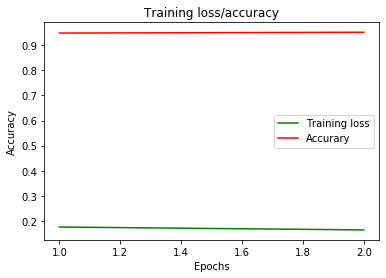

In [142]:
history_dict = history.history

loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss', color='green')
plt.plot(epochs, accuracy_values, 'b', label='Accurary', color='red')

plt.title('Training loss/accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [148]:
# using one of train images (images from other sources are not working is currently not demonstrative)
extracted_face = extract_face('lfw\Pamela_Anderson\Pamela_Anderson_0004.jpg')
X_test = np.array(extracted_face)
X_test = np.expand_dims(X_test, axis=0)
X_test = X_test / 255.0
classes = model.predict_classes(X_test, batch_size=1, verbose=1)

Image: lfw\Pamela_Anderson\Pamela_Anderson_0004.jpg scale: 1.05
1/1 [==============================] - 0s 16ms/sample


In [149]:
predicted_person = all_person_extracted_faces[classes[0]]
predicted_person_name = predicted_person['name']
predicted_person_faces = predicted_person['faces']

print('It could be:', predicted_person_name)

It could be: Pamela_Anderson


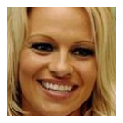

 ... could be ...


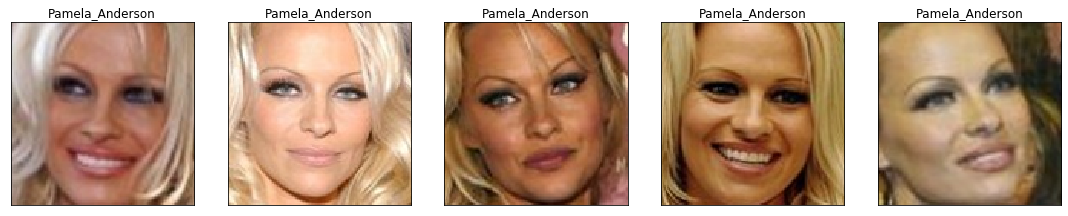

In [150]:
plt.figure(figsize=(2,2))
plt.axis("off")
plt.imshow(cv2.cvtColor(extracted_face, cv2.COLOR_BGR2RGB))
plt.show()

fig = plt.figure(figsize=(30, 30))
plt.axis("off")

print (' ... could be ...')

for i in range(len(predicted_person_faces)):
    plt.subplot(1, 10, i+1)
    plt.tight_layout()
    plt.imshow(cv2.cvtColor(predicted_person_faces[i], cv2.COLOR_BGR2RGB), interpolation='none')
    plt.title(predicted_person_name)
    plt.xticks([])
    plt.yticks([])
    if i == 9:
        break